# Loading In Necessary Datasets, Libraries, and Some Simple Preliminary Data Cleaning and Manipulation

In [ ]:
import pandas as pd
import seaborn as sns
import io
import re
import math
import statsmodels.api as sm
from datetime import datetime

import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

import sklearn
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import scipy.stats as stats
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor



df_brooklyn = pd.read_csv('2003-2021_brooklyn_formatted_2.csv', sep=",")
df_cpi = pd.read_csv('input_accounts_21_10_2022.csv', sep=",")
df_mr = pd.read_csv('FM_PMMS_weekly.csv', sep=";")
df_imputed = pd.read_csv('df_imputed.csv', sep=",")
df_clean = pd.read_csv('df_clean_complete.csv', sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
pd.options.display.max_columns=None

In [ ]:
df_clean

,Unnamed: 0,index,neighborhood,building_class_category,block,lot,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,day,month_number,month_name,year,age_at_sale,sale_price_log,gross_square_feet_log,price_per_gross_square_foot,price_per_gross_square_foot_logged,price_per_gross_square_foot_ln,outlier,day_of_year,week_of_year,x_norm,cos_x,sin_x,cpi_at_sale,FRM_30,FRM_15,year_built_cate,year_c,year_built_c,month_number_c
0,0,1,BATH BEACH,1,6364.0,74.0,72 BAY 14TH STREET,11214.0,1.0,0.0,1.0,2492,972.0,1950.0,1.0,A5,890000.0,2021-08-10,10,8,August,2021,71.0,13.698977,6.879356,915.637860,1.991317,6.819621,0.0,222,32,3.811112,-0.784120,-0.620609,293.927,2.87,2.15,1931-1955,2021,1950.0,8
1,1,2,BATH BEACH,1,6367.0,24.0,8645 BAY 16 STREE,11214.0,1.0,0.0,1.0,1571,1456.0,1935.0,1.0,A9,925000.0,2021-03-11,11,3,March,2021,86.0,13.737549,7.283448,635.302198,1.886133,6.454101,0.0,70,10,1.201702,0.360771,0.932655,287.481,3.05,2.38,1931-1955,2021,1935.0,3
2,2,5,BATH BEACH,1,6380.0,73.0,8672 BAY PARKWAY,11214.0,1.0,1.0,2.0,1740,2124.0,1960.0,1.0,S1,990000.0,2021-02-22,22,2,February,2021,61.0,13.805460,7.661056,466.101695,1.802031,6.144404,0.0,53,8,0.909860,0.613856,0.789418,286.474,2.97,2.34,1956-2022,2021,1960.0,2
3,3,8,BATH BEACH,1,6410.0,54.0,122 BAY 26TH STREET,11214.0,1.0,0.0,1.0,9667,3972.0,1901.0,1.0,A1,2800000.0,2021-10-31,31,10,October,2021,120.0,14.845130,8.287025,704.934542,1.791370,6.558105,0.0,304,43,5.218821,0.485060,-0.874481,296.472,3.14,2.37,0-1909,2021,1901.0,10
4,4,9,BATH BEACH,1,6425.0,11.0,241 BAY 7TH STREET,11228.0,1.0,0.0,1.0,1452,1188.0,1935.0,1.0,A5,870000.0,2021-04-30,30,4,April,2021,86.0,13.676248,7.080026,732.323232,1.931666,6.596222,0.0,120,17,2.060061,-0.469977,0.882679,289.493,2.98,2.31,1931-1955,2021,1935.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173820,174168,493114,WYCKOFF HEIGHTS,30,3176.0,36.0,6 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2165,1780.0,1931.0,4.0,E9,192000.0,2003-08-29,29,8,August,2003,72.0,12.165251,7.484369,107.865169,1.625421,4.680882,0.0,241,35,4.137289,-0.543919,-0.839138,199.100,6.32,5.66,1931-1955,2003,1931.0,8
173821,174169,493116,WYCKOFF HEIGHTS,30,3177.0,2.0,17 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2357,4713.0,1931.0,4.0,E9,225000.0,2003-12-29,29,12,December,2003,72.0,12.323856,8.458080,47.740293,1.457051,3.865776,0.0,363,1,6.231684,0.998674,-0.051479,199.300,5.85,5.24,1931-1955,2003,1931.0,12
173822,174170,493116,WYCKOFF HEIGHTS,30,3177.0,2.0,17 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2357,4713.0,1931.0,4.0,E9,225000.0,2003-12-29,29,12,December,2003,72.0,12.323856,8.458080,47.740293,1.457051,3.865776,0.0,363,1,6.231684,0.998674,-0.051479,199.300,5.85,5.15,1931-1955,2003,1931.0,12
173823,174171,493117,WYCKOFF HEIGHTS,30,3177.0,2.0,17 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2357,4713.0,1931.0,4.0,E9,200000.0,2003-09-24,24,9,September,2003,72.0,12.206073,8.458080,42.435816,1.443126,3.747993,0.0,267,39,4.583635,-0.128398,-0.991723,199.600,5.98,5.30,1931-1955,2003,1931.0,9


In [ ]:
df_brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493121 entries, 0 to 493120
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         493120 non-null  float64
 1   NEIGHBORHOOD                    493120 non-null  object 
 2   BUILDING CLASS CATEGORY         493120 non-null  object 
 3   TAX CLASS AT PRESENT            492929 non-null  object 
 4   BLOCK                           493120 non-null  float64
 5   LOT                             493120 non-null  float64
 6   EASE-MENT                       397315 non-null  object 
 7   BUILDING CLASS AT PRESENT       492929 non-null  object 
 8   ADDRESS                         493120 non-null  object 
 9   APARTMENT NUMBER                423477 non-null  object 
 10  ZIP CODE                        493117 non-null  float64
 11  RESIDENTIAL
UNITS               483414 non-null  object 
 12  COMMERCIAL
UNITS

In [ ]:
def convert_price_string_to_float(df):
  """Cleans and converts the sale_price field to float"""
  
  # remove prices that are coded as an empty string
  print(f"Removing rows with sale_price set below $20,000 or NaN. Starting with {len(df)} rows ")

  # finally, convert remove all 0's or values below $20,000
  df = df[~df['sale_price'].isnull()]
  df = df.query("sale_price != 0").copy()
  df = df.query("sale_price > 20000").copy()
  print(f"Ended with {len(df)} rows")      

  return df


def clean_year_built(df):

  print(f"Cleaning year_built, removing 0 values. Starting with {len(df)} rows")
  df = df.query("year_built != 0").copy()
  df = df[~df['year_built'].isnull()]
  print(f"Ended with {len(df)} rows")      
  return df


def extract_sale_date_components(df):

  df['sale_date'] = pd.to_datetime(df['sale_date'])
  df['day'] = df['sale_date'].dt.day
  df['month_number'] = df['sale_date'].dt.month
  df['month_name'] = df['sale_date'].dt.month_name()
  df['year'] = df['sale_date'].dt.year

  return df
  

def add_age_at_sale(df):

    print("Adding age at sale")
    df['age_at_sale'] = df['year'] - df['year_built']
    df = df.query("age_at_sale >= 0").copy()

    return df


def clean_building_class_category(df):

  print("Cleaning building_class_category")
  df['building_class_category'] = df['building_class_category'].astype(str)

  print(f"Starting with {len(df)} rows")
  df = df.query("building_class_category != ''").copy()
  df = df[~df['building_class_category'].isnull()]
  df['building_class_category']= df['building_class_category'].str.split(' ', expand=True) [0]
  print(f"Ended with {len(df)} rows")

  return df


def clean_tax_class_at_time_of_sale(df):

  print("Cleaning tax_class_at_time_of_sale")
  print(f"Starting with {len(df)} rows")
  df = df.query("tax_class_at_time_of_sale != ''").copy()
  df = df.query("tax_class_at_time_of_sale != 0").copy()
  df = df[~df['tax_class_at_time_of_sale'].isnull()]
  df['tax_class_at_time_of_sale'] = df['tax_class_at_time_of_sale'].astype('str')
  print(f"Ended with {len(df)} rows")

  return df


def clean_building_class_at_time_of_sale(df):

  print("Cleaning building_class_at_time_of_sale")
  df['building_class_at_time_of_sale'] = (
      df['building_class_at_time_of_sale']
      .str.strip(" ")
      .str.replace(" ","")
      .str.strip("-/")
      )

  print(f"Starting with {len(df)} rows")
  df = df.query("building_class_at_time_of_sale != ''").copy()
  df = df.query("building_class_at_time_of_sale != '0'").copy()
  df = df.query("building_class_at_time_of_sale != 0").copy()
  df = df[~df['building_class_at_time_of_sale'].isnull()]
  #df['building_class_at_time_of_sale'] = df['building_class_at_time_of_sale'].astype(str).str[0]

  print(f"Ended with {len(df)} rows")

  return df


def clean_zip_code(df):

  print("Cleaning zip_code")
 
  print(f"Starting with {len(df)} rows")
  df = df.query("zip_code != ''").copy()
  df = df.query("zip_code != 0").copy()
  df = df[~df['zip_code'].isnull()]
  df['zip_code'] = df['zip_code'].astype('str')
  print(f"Ended with {len(df)} rows")

  return df


def clean_land_square_feet(df):

  print("Cleaning land_square_feet")

  df['land_square_feet'] = (
      df['land_square_feet']
      .str.strip(" ")
      .str.strip("-")
      .str.replace(" ", "")
      .str.replace("-","")
      )
 
  print(f"Starting with {len(df)} rows")
  #df = df.query("land_square_feet != ''").copy()
  #df = df.query("land_square_feet != '0'").copy()
  #df = df[~df['land_square_feet'].isnull()]
  df['land_square_feet'] = df['land_square_feet']
  print(f"Ended with {len(df)} rows")

  return df


def clean_gross_square_feet(df):

  print("Cleaning gross_square_feet")

  df['gross_square_feet'] = (
      df['gross_square_feet']
      .str.strip(" ")
      .str.strip("-")
      .str.replace(" ", "")
      .str.replace("-","")
      )
 
  print(f"Starting with {len(df)} rows")
  #f = df.query("gross_square_feet != ''").copy()
  #df = df.query("gross_square_feet != '0'").copy()
  #df = df[~df['gross_square_feet'].isnull()]
  print(f"Ended with {len(df)} rows")

  return df

def clean_units(df):

  print("Cleaning unit parameters")

  df['residential_units'] = df['residential_units'].astype(str)
  df['residential_units'] = (
      df['residential_units']
      .str.strip(" ")
      .str.replace(" ", "")
      .str.replace("-","0")
      )
  
  df['commercial_units'] = df['commercial_units'].astype(str)
  df['commercial_units'] = (
      df['commercial_units']
      .str.strip(" ")
      .str.replace(" ", "")
      .str.replace("-","0")
      )
  
  df['total_units'] = df['total_units'].astype(str)
  df['total_units'] = (
      df['total_units']
      .str.strip(" ")
      .str.strip("-")
      .str.replace(" ", "")
      .str.replace("-","0")
      )

  print(f"Starting with {len(df)} rows")
  df = df[~df['residential_units'].isnull()]
  df = df.query("residential_units != ''").copy()
  df = df[~df['commercial_units'].isnull()]
  df = df.query("commercial_units != ''").copy()
  df = df[~df['total_units'].isnull()]
  df = df.query("total_units != ''").copy()
  df['residential_units'] = df['residential_units'].astype(float)
  df['commercial_units'] = df['commercial_units'].astype(float)
  df['total_units'] = df['total_units'].astype(float)
  df = df[~df['residential_units'].isnull()]
  df = df.query("residential_units != ''").copy()
  df = df[~df['commercial_units'].isnull()]
  df = df.query("commercial_units != ''").copy()
  df = df[~df['total_units'].isnull()]
  df = df.query("total_units != ''").copy()
  print(f"Ended with {len(df)} rows")

  return df

In [ ]:
# convert columns to lower case 
df_brooklyn.columns = df_brooklyn.columns.str.lower().str.replace("\n", " ").str.replace("  ", " ").str.replace(" ", "_")

df_brooklyn_clean = (df_brooklyn
            .pipe(convert_price_string_to_float)
            .pipe(clean_year_built)
            .pipe(extract_sale_date_components)
            .pipe(add_age_at_sale)
            .pipe(clean_building_class_category)
            .pipe(clean_tax_class_at_time_of_sale)
            .pipe(clean_building_class_at_time_of_sale)
            .pipe(clean_zip_code)
            .pipe(clean_land_square_feet)
            .pipe(clean_gross_square_feet)
            .pipe(clean_units)
            .drop("ease-ment", axis=1)
            .drop("borough", axis=1)
            .drop("apartment_number", axis=1)
            .drop("tax_class_at_present", axis=1)
            .drop("building_class_at_present", axis=1)
            )

Removing rows with sale_price set below $20,000 or NaN. Starting with 493121 rows 
Ended with 303373 rows
Cleaning year_built, removing 0 values. Starting with 303373 rows
Ended with 271281 rows
Adding age at sale
Cleaning building_class_category
Starting with 268751 rows
Ended with 268751 rows
Cleaning tax_class_at_time_of_sale
Starting with 268751 rows
Ended with 268751 rows
Cleaning building_class_at_time_of_sale
Starting with 268751 rows
Ended with 268751 rows
Cleaning zip_code
Starting with 268751 rows
Ended with 268656 rows
Cleaning land_square_feet
Starting with 268656 rows
Ended with 268656 rows
Cleaning gross_square_feet
Starting with 268656 rows
Ended with 268656 rows
Cleaning unit parameters
Starting with 268656 rows
Ended with 253154 rows


**The preliminary stage of retrieving all necessary data and simple cleaning process is complete.**


---
# Train set manipulation

**The next step is to split the data set into the Train and Test sets and then work with the Train set in order to complete more advanced cleaning and then process several working models investigating the effect of time.**





In [ ]:
df_clean = df_brooklyn_clean
#.sample(frac=0.8,random_state=37) #37 used as seed
#df_test = df_brooklyn_clean.drop(df_clean.index)

In [ ]:
df_clean.loc[df_clean['gross_square_feet'] == '0', 'gross_square_feet'] = np.nan
df_clean.loc[df_clean['gross_square_feet'] == '', 'gross_square_feet'] = np.nan
df_clean['gross_square_feet'] = df_clean['gross_square_feet'].astype(float)

In [ ]:
df_clean = df_clean.reset_index()

In [ ]:
print(np.corrcoef((df_clean[~df_clean['gross_square_feet'].isna()])['residential_units'], (df_clean[~df_clean['gross_square_feet'].isna()])['gross_square_feet']))
print(np.corrcoef((df_clean[~df_clean['gross_square_feet'].isna()])['commercial_units'], (df_clean[~df_clean['gross_square_feet'].isna()])['gross_square_feet']))

[[1.         0.86817827]
 [0.86817827 1.        ]]
[[1.         0.15122777]
 [0.15122777 1.        ]]


# For Now Removing All Null GSA entries from df_clean until KNN imputation gets sorted out

In [ ]:
df_clean = df_clean[~df_clean['gross_square_feet'].isnull()].copy()

In [ ]:
df_clean['sale_price_log'] = np.log(df_clean['sale_price'])
df_clean = df_clean.query("gross_square_feet > 1").copy()

#Log of 1 equal to zero, which will not result in imaginary numbers when constructing price per foot variables later

df_clean['gross_square_feet_log'] = np.log(df_clean['gross_square_feet'])

In [ ]:
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew

print(skew(np.array(df_clean['sale_price']), bias=False))
print(kurtosis(np.array(df_clean['sale_price']), fisher=False))

print(skew(np.array(df_clean['sale_price_log']), bias=False))
print(kurtosis(np.array(df_clean['sale_price_log']), fisher=False))

In [ ]:
print(skew(np.array(df_clean['gross_square_feet']), bias=False))
print(kurtosis(np.array(df_clean['gross_square_feet']), fisher=False))

print(skew(np.array(df_clean['gross_square_feet_log']), bias=False))
print(kurtosis(np.array(df_clean['gross_square_feet_log']), fisher=False))

(-500000.0, 20000000.0)

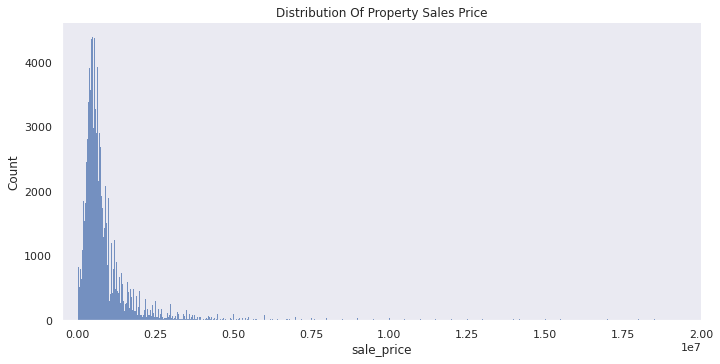

In [ ]:
sns.set(style='dark')
sns.displot(df_clean, x="sale_price", log_scale=(False), height=5, aspect=2, fill=(True)).set(title='Distribution Of Property Sales Price')
plt.xlim([-500000, 20000000])

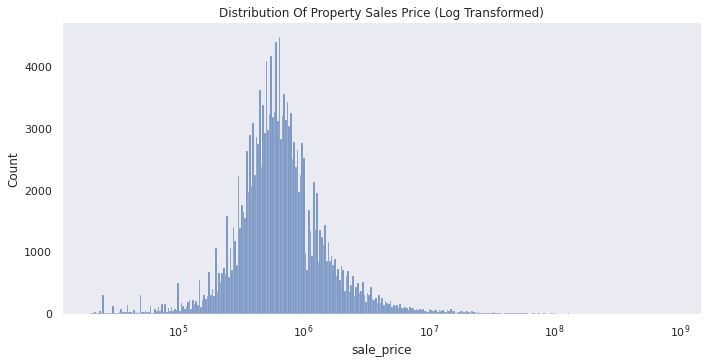

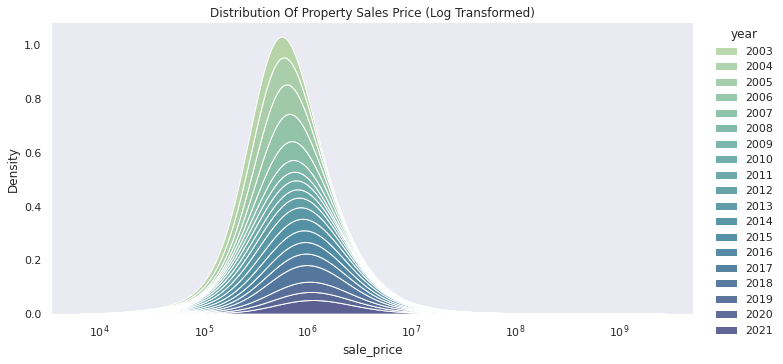

In [ ]:
sns.set(style='dark')
sns.displot(df_clean, x="sale_price", log_scale=(True), height=5, aspect=2).set(title='Distribution Of Property Sales Price (Log Transformed)')
sns.displot(df_clean, x="sale_price", kind="kde", log_scale=(True), height=5, aspect=2, bw_adjust=5, hue="year", palette="crest", multiple="stack").set(title='Distribution Of Property Sales Price (Log Transformed)')

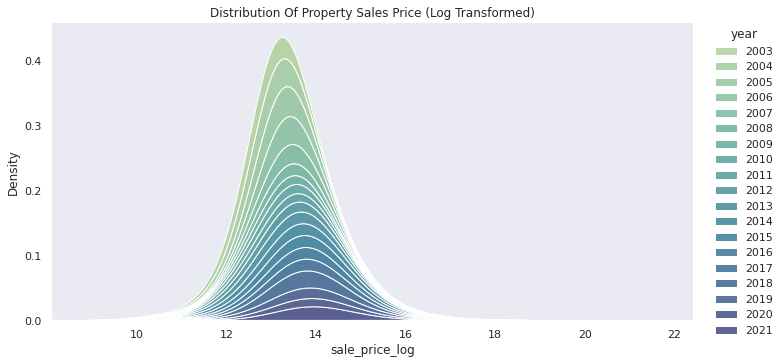

In [ ]:
sns.displot(df_clean, x="sale_price_log", kind="kde", log_scale=(False), height=5, aspect=2, bw_adjust=5, hue="year", palette="crest", multiple="stack").set(title='Distribution Of Property Sales Price (Log Transformed)')

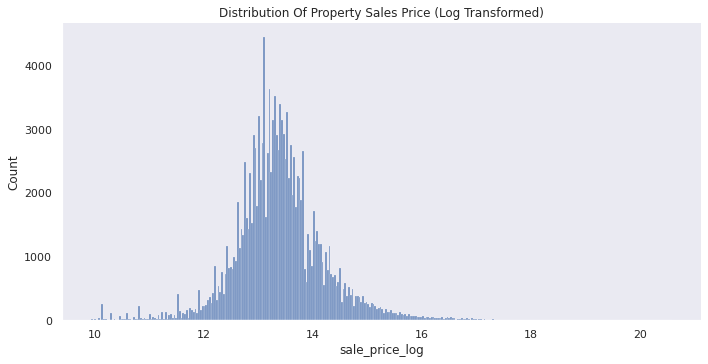

In [ ]:
sns.displot(df_clean, x="sale_price_log", log_scale=(False), height=5, aspect=2).set(title='Distribution Of Property Sales Price (Log Transformed)')

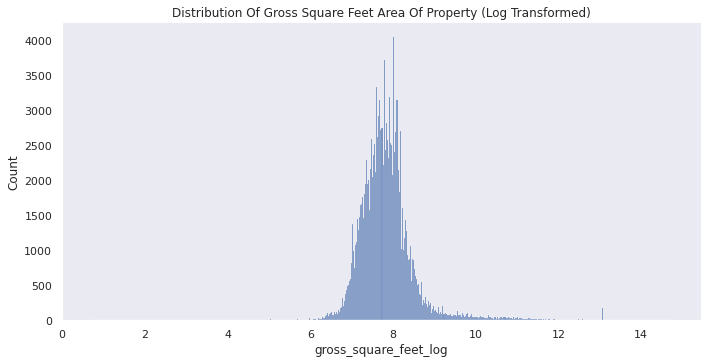

In [ ]:
sns.displot(df_clean, x="gross_square_feet_log", log_scale=(False), height=5, aspect=2).set(title='Distribution Of Gross Square Feet Area Of Property (Log Transformed)')

In [ ]:
df_clean['price_per_gross_square_foot']= df_clean['sale_price']/df_clean['gross_square_feet'].astype(float)
df_clean['price_per_gross_square_foot_logged'] = df_clean['sale_price_log']/df_clean['gross_square_feet_log'].astype(float)
df_clean['price_per_gross_square_foot_ln']= np.log(df_clean['price_per_gross_square_foot'])
df_clean = df_clean.query("price_per_gross_square_foot_ln > 0").copy()
df_clean[df_clean['price_per_gross_square_foot_ln']<0]

,index,neighborhood,building_class_category,block,lot,address,zip_code,residential_units,commercial_units,total_units,...,day,month_number,month_name,year,age_at_sale,sale_price_log,gross_square_feet_log,price_per_gross_square_foot,price_per_gross_square_foot_logged,price_per_gross_square_foot_ln


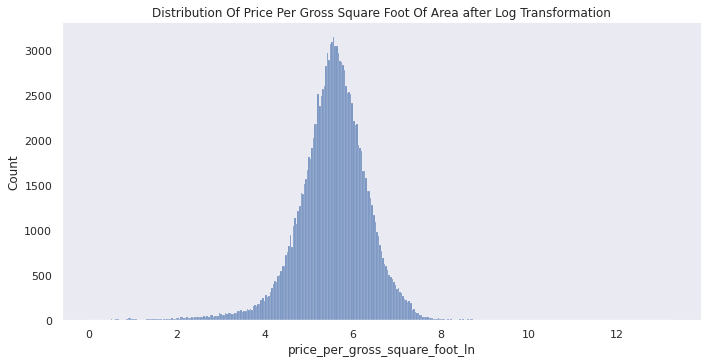

In [ ]:
sns.displot(df_clean, x="price_per_gross_square_foot_ln", log_scale=(False), palette="crest", height=5, aspect=2, fill=(True)).set(title='Distribution Of Price Per Gross Square Foot Of Area after Log Transformation')
plt.show()

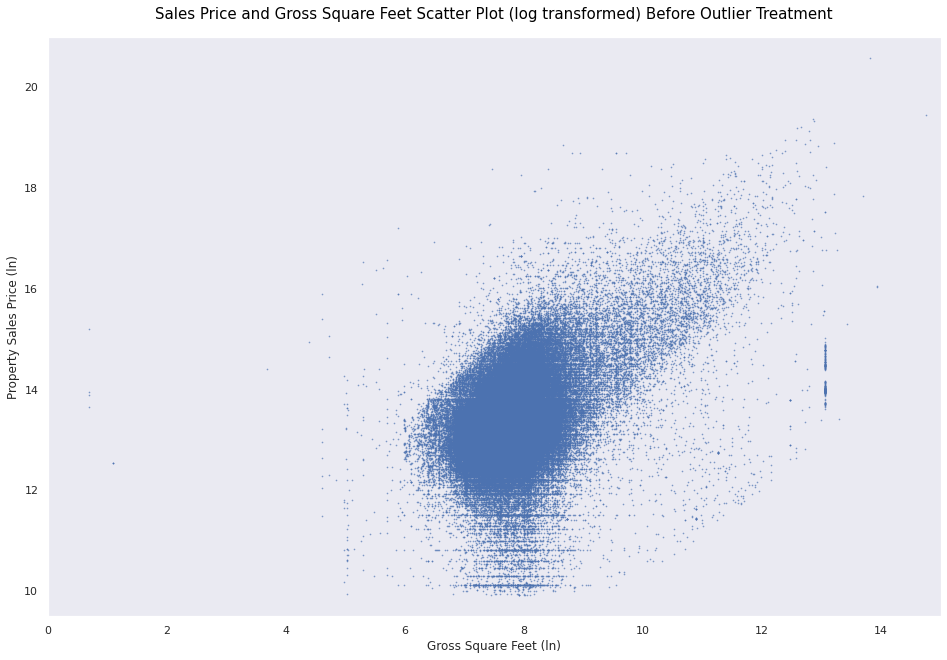

In [ ]:
plt.plot( 'gross_square_feet_log', 'sale_price_log', "", data=df_clean, linestyle='', marker='o', markersize=0.7, alpha=0.60)
plt.xlabel('Gross Square Feet (ln)', fontsize=12)
plt.ylabel('Property Sales Price (ln)', fontsize=12, x=0.97)
plt.title('Sales Price and Gross Square Feet Scatter Plot (log transformed) Before Outlier Treatment', fontsize=15, fontweight=0, color='Black', y=1.02)
plt.rcParams["figure.figsize"] = (16,14)
plt.subplots_adjust(top=0.7)
plt.xlim([0, 15])
plt.ylim([9.5, 21])
plt.show()

In [ ]:
def percentile_lower_bound(data, percentile):
    #Lower bound value based on by percentile level
    lowbound_pcntl = np.percentile(data, percentile)
    # Returning lower limit
    return lowbound_pcntl

def percentile_upper_bound(data, percentile):
    #Upper bound value based on by percentile level
    upbound_pcntl = np.percentile(data, 100 - percentile)
    # Returning upper limit
    return upbound_pcntl

ppgsfl_pcntl_low = percentile_lower_bound(df_clean['price_per_gross_square_foot_ln'], 1)
ppgsfl_pcntl_upper = percentile_upper_bound(df_clean['price_per_gross_square_foot_ln'], 1)

def std_low_bound(df):
    # Creating three standard deviations away boundary
    std = np.std(df)
    lowbound_std3rd = np.mean(df) - 3 * std
    # Returning the lower limit
    return lowbound_std3rd

def std_upper_bound(df):
    # Creating three standard deviations away boundariey
    std = np.std(df)
    upbound_std3rd = np.mean(df) + 3 * std
    # Returning the upper limit
    return upbound_std3rd

ppgsfl_std_low = std_low_bound(df_clean['price_per_gross_square_foot_ln'])
ppgsfl_std_upper = std_upper_bound(df_clean['price_per_gross_square_foot_ln'])

In [ ]:
print(ppgsfl_pcntl_low)
print(ppgsfl_pcntl_upper)
print()
print(ppgsfl_std_low)
print(ppgsfl_std_upper)

2.864704011147587
7.308218842625094

3.0674463587833323
8.020101013177573


In [ ]:
# Use a combination of 1% precentiles removal and 3 std removal method

ppgsfl_low_bound = ((ppgsfl_pcntl_low + ppgsfl_std_low)/2)
ppgsfl_upper_bound = ((ppgsfl_pcntl_upper + ppgsfl_std_upper)/2)

print(ppgsfl_low_bound)
print(ppgsfl_upper_bound)

2.96607518496546
7.664159927901334


In [ ]:
df_clean.loc[df_clean['price_per_gross_square_foot_ln'] < ppgsfl_low_bound, 'outlier'] = 1
df_clean.loc[df_clean['price_per_gross_square_foot_ln'] > ppgsfl_upper_bound, 'outlier'] = 1

In [ ]:
df_clean.loc[df_clean['price_per_gross_square_foot_ln'] < ppgsfl_low_bound]

In [ ]:
df_clean.loc[df_clean['price_per_gross_square_foot_ln'] > ppgsfl_upper_bound]

In [ ]:
df_clean.loc[df_clean['outlier'] != 1, 'outlier'] = 0

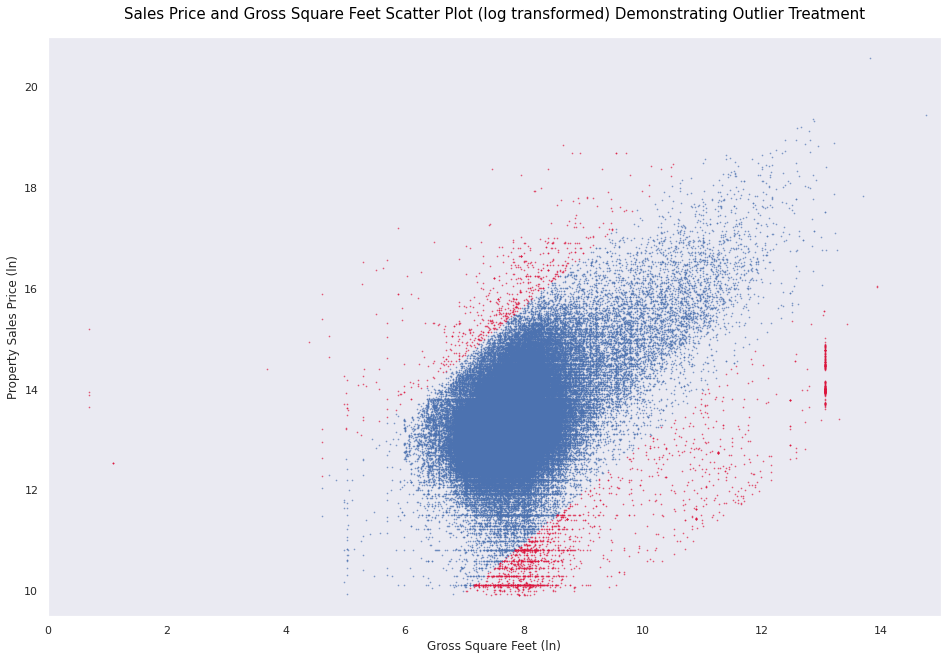

In [ ]:
plt.plot( 'gross_square_feet_log', 'sale_price_log', "", data= df_clean[df_clean['outlier']==0], linestyle='', marker='o', markersize=0.7, alpha=0.60, label='Non-Outliers')
plt.plot( 'gross_square_feet_log', 'sale_price_log', "", data= df_clean[df_clean['outlier']==1], linestyle='', marker='o', color="crimson", markersize=0.7, alpha=0.60, label='Outliers')
plt.xlabel('Gross Square Feet (ln)', fontsize=12)
plt.ylabel('Property Sales Price (ln)', fontsize=12, x=0.97)
plt.title('Sales Price and Gross Square Feet Scatter Plot (log transformed) Demonstrating Outlier Treatment', fontsize=15, fontweight=0, color='Black', y=1.02)
plt.rcParams["figure.figsize"] = (16,14)
plt.subplots_adjust(top=0.7)
plt.xlim([0, 15])
plt.ylim([9.5, 21])
plt.show()

In [ ]:
pd.options.display.max_columns=None
df_clean.loc[(df_clean['gross_square_feet_log'] > 13.062) & (df_clean['gross_square_feet_log'] < 13.065)]

In [ ]:
df_clean= df_clean[df_clean['price_per_gross_square_foot_ln']> ppgsfl_low_bound]
df_clean= df_clean[df_clean['price_per_gross_square_foot_ln']< ppgsfl_upper_bound]

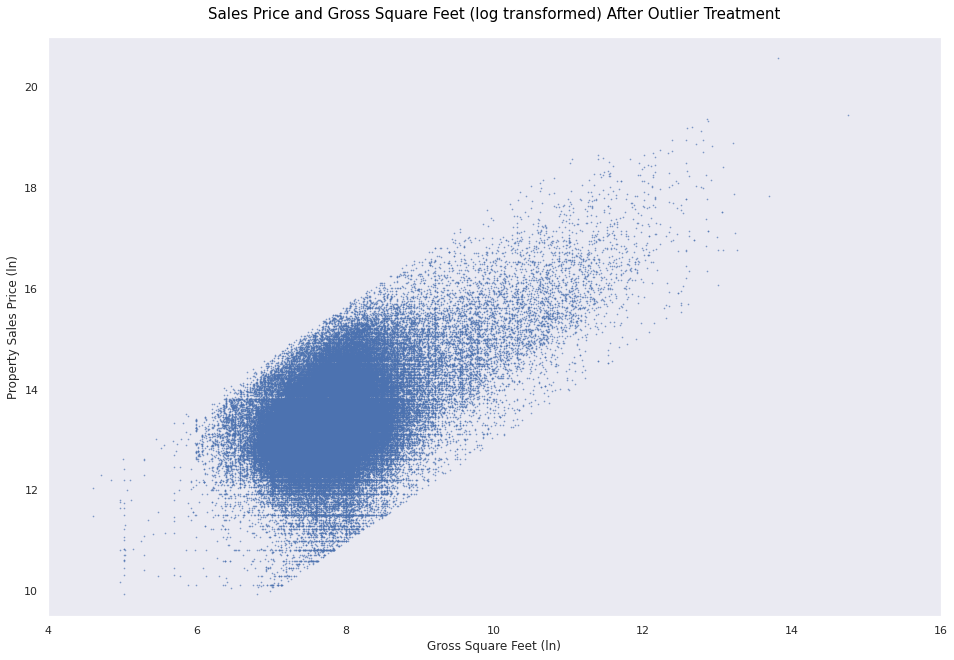

In [ ]:
# New Scatter Plot between Price and GSA (Logged) after removal of outliers from data

plt.plot( 'gross_square_feet_log', 'sale_price_log', "", data=df_clean, linestyle='', marker='o', markersize=0.7, alpha=0.60)
plt.xlabel('Gross Square Feet (ln)', fontsize=12)
plt.ylabel('Property Sales Price (ln)', fontsize=12, x=0.97)
plt.title('Sales Price and Gross Square Feet (log transformed) After Outlier Treatment', fontsize=15, fontweight=0, color='Black', y=1.02)
plt.rcParams["figure.figsize"] = (16,14)
plt.xlim([4, 16])
plt.ylim([9.5, 21])
plt.subplots_adjust(top=0.7)
plt.show()

In [ ]:
df_clean['day_of_year']=df_clean['sale_date'].dt.dayofyear
df_clean['week_of_year']=df_clean['sale_date'].dt.weekofyear
df_clean['day_of_year']=df_clean['day_of_year'].astype(int)
df_clean['week_of_year']=df_clean['week_of_year'].astype(int)
df_clean[df_clean['week_of_year']== 53]

df_clean['x_norm'] = 2 * math.pi * df_clean['day_of_year'] / df_clean['day_of_year'].max()

df_clean['cos_x'] = np.cos(df_clean['x_norm'])

df_clean['sin_x'] = np.sin(df_clean['x_norm'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df_circle=df_clean.groupby(['day_of_year']).mean()[['sale_price','sale_price_log','sin_x','cos_x']]
df_circle['med_sale_price']=df_clean.groupby(['day_of_year']).median()[['sale_price']]
df_circle['med_sale_price_log']=df_clean.groupby(['day_of_year']).median()[['sale_price_log']]

df_mont=df_clean.groupby(['month_name']).mean()[['sale_price','sale_price_log','sin_x','cos_x']]
df_mont['med_sale_price']=df_clean.groupby(['month_name']).median()[['sale_price']]
df_mont['med_sale_price_log']=df_clean.groupby(['month_name']).median()[['sale_price_log']]

df_weekly=df_clean.groupby(['week_of_year']).mean()[['sale_price','sale_price_log','sin_x','cos_x']]
df_weekly['med_sale_price']=df_clean.groupby(['week_of_year']).median()[['sale_price']]
df_weekly['med_sale_price_log']=df_clean.groupby(['week_of_year']).median()[['sale_price_log']]

df_yearly=df_clean.groupby(['year']).mean()[['sale_price','sale_price_log','sin_x','cos_x']]
df_yearly['med_sale_price']=df_clean.groupby(['year']).median()[['sale_price']]
df_yearly['med_sale_price_log']=df_clean.groupby(['year']).median()[['sale_price_log']]

In [ ]:
df_circle_sorted = df_circle.sort_values('sale_price', ascending=False)

In [ ]:
df_circle_sorted

,sale_price,sale_price_log,sin_x,cos_x,med_sale_price,med_sale_price_log
day_of_year,,,,,,
95,3.103147e+06,13.424842,9.981954e-01,-0.060049,620250.0,13.337878
366,2.347982e+06,13.601917,-2.449294e-16,1.000000,700000.0,13.458836
43,2.290466e+06,13.457610,6.729490e-01,0.739689,620000.0,13.337475
357,2.040203e+06,13.530718,-1.538906e-01,0.988088,650000.0,13.384728
360,1.870436e+06,13.534607,-1.028210e-01,0.994700,710148.5,13.473229
...,...,...,...,...,...,...
286,7.889954e+05,13.332384,-9.805754e-01,0.196143,625000.0,13.345507
118,7.777910e+05,13.284448,8.982918e-01,-0.439400,560000.0,13.235692
55,7.575855e+05,13.294258,8.100249e-01,0.586396,595000.0,13.296317


In [ ]:
df_circle[df_circle.index==366]

,sale_price,sale_price_log,sin_x,cos_x,med_sale_price,med_sale_price_log
day_of_year,,,,,,
366,2.132601e+06,13.634471,-2.449294e-16,1.0,737000.0,13.510339


In [ ]:
df_mont = df_mont.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [ ]:
df_mont

,sale_price,sale_price_log,sin_x,cos_x,med_sale_price,med_sale_price_log
month_name,,,,,,
January,1.055693e+06,13.401654,0.287240,0.945763,615000.0,13.329378
February,1.043604e+06,13.389755,0.709850,0.689290,615130.0,13.329589
March,1.043464e+06,13.374924,0.954267,0.255939,609000.0,13.319574
April,1.050070e+06,13.361940,0.953977,-0.258466,600000.0,13.304685
May,1.013479e+06,13.396000,0.704415,-0.693149,615000.0,13.329378
June,1.098004e+06,13.443993,0.248153,-0.956679,636000.0,13.362954
July,1.086654e+06,13.414102,-0.258755,-0.953469,625000.0,13.345507
August,1.045131e+06,13.421886,-0.702346,-0.694573,630000.0,13.353475
September,1.006459e+06,13.398473,-0.956292,-0.249850,623000.0,13.342302


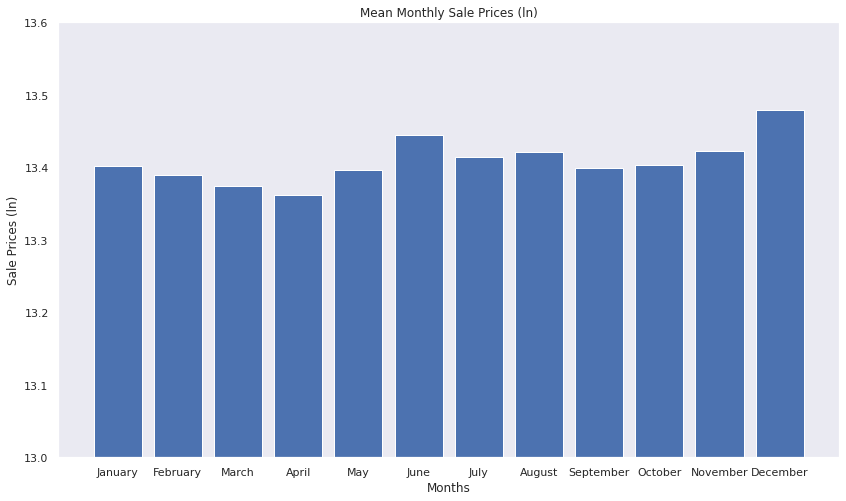

In [ ]:
monthly_means = df_mont['sale_price_log']
months = df_mont.index
x_pos = np.arange(len(months))

plt.figure(figsize=(14,8))
plt.bar(x_pos, monthly_means)
 
plt.title('Mean Monthly Sale Prices (ln)')
plt.xlabel('Months')
plt.ylabel('Sale Prices (ln)')

plt.xticks(x_pos, months)
plt.ylim([13.00, 13.60])


# Show graph
plt.show()

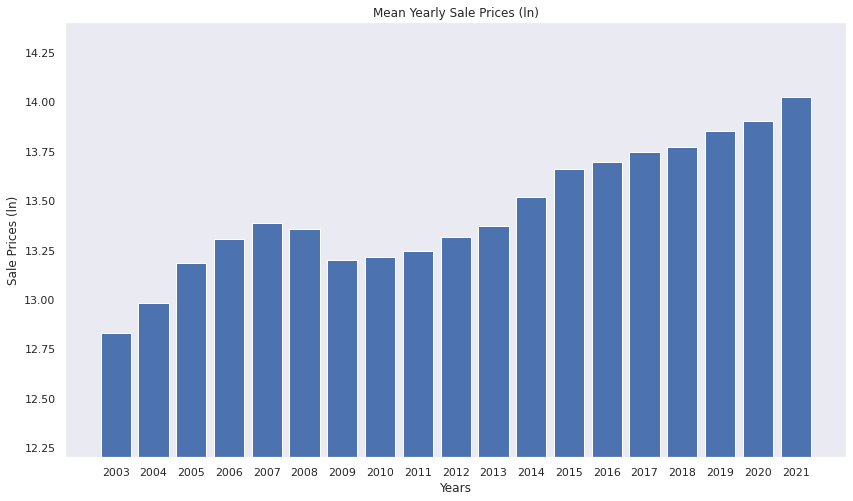

In [ ]:
yearly_means = df_yearly['sale_price_log']
years = df_yearly.index
x_pos = np.arange(len(years))

plt.figure(figsize=(14,8))
plt.bar(x_pos, yearly_means)
 
plt.title('Mean Yearly Sale Prices (ln)')
plt.xlabel('Years')
plt.ylabel('Sale Prices (ln)')

plt.xticks(x_pos, years)
plt.ylim([12.20, 14.40])

# Show graph
plt.show()

In [ ]:
df_weekly_2003 =df_clean[df_clean['year'] == 2003].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2004 =df_clean[df_clean['year'] == 2004].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2005 =df_clean[df_clean['year'] == 2005].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2006 =df_clean[df_clean['year'] == 2006].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2007 =df_clean[df_clean['year'] == 2007].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2008 =df_clean[df_clean['year'] == 2008].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2009 =df_clean[df_clean['year'] == 2009].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2010 =df_clean[df_clean['year'] == 2010].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2011 =df_clean[df_clean['year'] == 2011].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2012 =df_clean[df_clean['year'] == 2012].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2013 =df_clean[df_clean['year'] == 2013].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2014 =df_clean[df_clean['year'] == 2014].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2015 =df_clean[df_clean['year'] == 2015].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2016 =df_clean[df_clean['year'] == 2016].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2017 =df_clean[df_clean['year'] == 2017].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2018 =df_clean[df_clean['year'] == 2018].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2019 =df_clean[df_clean['year'] == 2019].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2020 =df_clean[df_clean['year'] == 2020].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]
df_weekly_2021 =df_clean[df_clean['year'] == 2021].groupby(['week_of_year']).mean()[['sale_price','sale_price_log']]

df_weekly_2003['year'] = '2003'
df_weekly_2004['year'] = '2004'
df_weekly_2005['year'] = '2005'
df_weekly_2006['year'] = '2006'
df_weekly_2007['year'] = '2007'
df_weekly_2008['year'] = '2008'
df_weekly_2009['year'] = '2009'
df_weekly_2010['year'] = '2010'
df_weekly_2011['year'] = '2011'
df_weekly_2012['year'] = '2012'
df_weekly_2013['year'] = '2013'
df_weekly_2014['year'] = '2014'
df_weekly_2015['year'] = '2015'
df_weekly_2016['year'] = '2016'
df_weekly_2017['year'] = '2017'
df_weekly_2018['year'] = '2018'
df_weekly_2019['year'] = '2019'
df_weekly_2020['year'] = '2020'
df_weekly_2021['year'] = '2021'

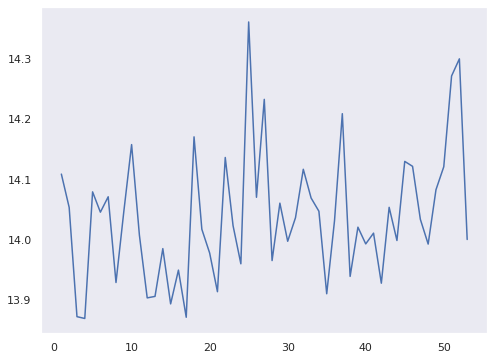

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_weekly_2021.index, df_weekly_2021['sale_price_log']);

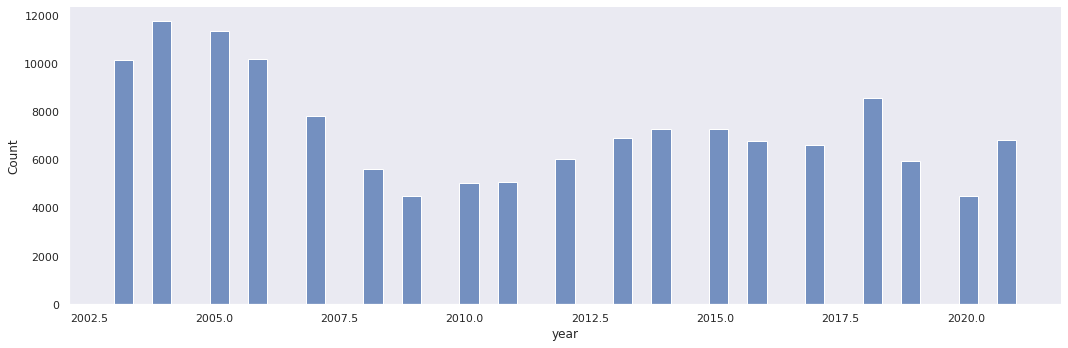

In [ ]:
sns.displot(df_clean, x='year', aspect=3)

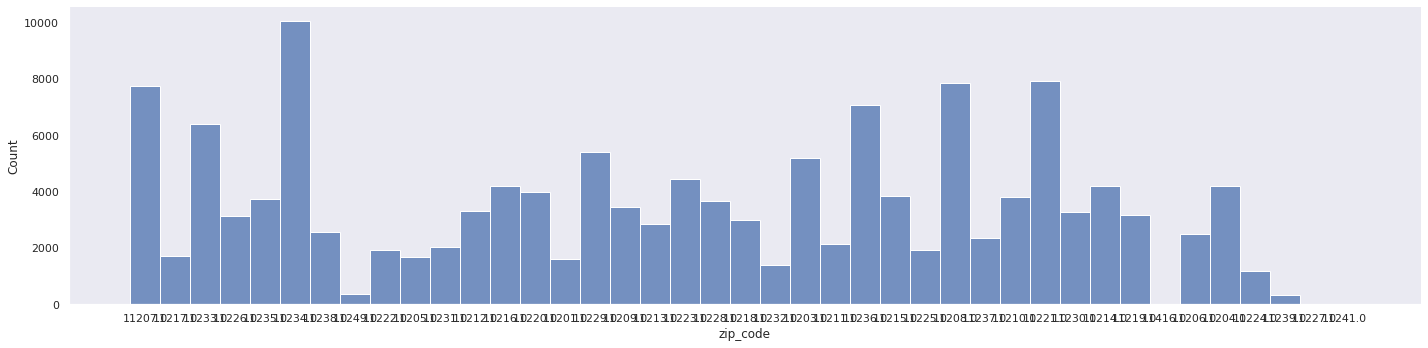

In [ ]:
sns.displot(df_clean, x='zip_code', aspect=4)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_circle.sin_x, y=df_circle.cos_x, mode='markers', marker=dict(color= df_circle['med_sale_price_log'], colorbar=dict(title='Daily Medium (ln)<br>Price Of Property'), colorscale="blues")))

fig.update_layout(xaxis = dict(title='Autumn             <- sin_x ->               Spring'), yaxis = dict(title='Winter            <- cos_x ->          Summer', scaleanchor = 'x', scaleratio = 1))

fig.update_yaxes(autorange='reversed')

fig.update_xaxes(range=[-1, 1])

fig.update_layout(
    autosize=False,
    width=900,
    height=500,)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x= df_mont.sin_x, y= df_mont.cos_x, mode='markers', marker=dict(color= df_mont['med_sale_price_log'], size=16, colorbar=dict(title='Monthly Medium (ln)<br>Price Of Property'))))

fig.update_layout(xaxis = dict(title='Autumn             <- sin_x ->               Spring'), yaxis = dict(title='Winter            <- cos_x ->          Summer', scaleanchor = 'x', scaleratio = 1))

fig.update_yaxes(autorange='reversed')

fig.update_xaxes(range=[-1, 1])

fig.update_layout(
    autosize=False,
    width=900,
    height=500,)

fig.show()

# Interesting to note that here more variation is indeed seen in between sinx= [1;-1] which was initially suggested by regression analysis earlier
# On the other hand, variation in houses prices from this chart on scale of cosx = [1;-1] appears to be more limited then in case of sinx
# The preliminary conclusion from the chart corroborates upon the idea that house prices vary more between Autumn <-> Spring instead of Summer <-> Winter


In [ ]:
df_cpi.drop(['Annual','HALF1','HALF2'], inplace=True, axis=1)
df_cpi_adj= pd.melt(df_cpi, id_vars=['Year'], var_name='Month', value_name='CPI')

from time import strptime

df_cpi_adj['month_number'] = df_cpi_adj['Month'].map(lambda x: strptime(x,'%b').tm_mon)
df_cpi_adj.columns = df_cpi_adj.columns.str.lower()

df_clean = df_clean.merge(df_cpi_adj,  on=['year', 'month_number'], how='left')
df_clean.rename({'cpi': 'cpi_at_sale'}, axis=1, inplace=True)

In [ ]:
df_mr['date'] = pd.to_datetime(df_mr['Week'], dayfirst=True)
df_mr['week_of_year'] = df_mr['date'].dt.weekofyear
df_mr['year'] = df_mr['date'].dt.year
df_mr.drop(['Week'], inplace=True, axis=1)

df_clean = df_clean.merge(df_mr, on=['year', 'week_of_year'], how='left')
df_clean.drop(['date'], inplace=True, axis=1)
df_clean.drop(['month'], inplace=True, axis=1)
df_clean.rename({'U.S 30 Year FRM': 'FRM_30'}, axis=1, inplace=True)
df_clean.rename({'U.S 15 year FRM': 'FRM_15'}, axis=1, inplace=True)

df_clean['FRM_30'] = df_clean['FRM_30'].astype(float)
df_clean['FRM_15'] = df_clean['FRM_15'].astype(float)
df_clean = df_clean[~df_clean['FRM_30'].isnull()]
df_clean = df_clean[~df_clean['FRM_15'].isnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df_clean.loc[df_clean['year_built'] < 1910, 'year_built_cate'] = '0-1909'
df_clean.loc[(df_clean['year_built'] >= 1910) & (df_clean['year_built'] < 1921), 'year_built_cate'] = '1910-1920'
df_clean.loc[(df_clean['year_built'] >= 1921) & (df_clean['year_built'] < 1931), 'year_built_cate'] = '1921-1930'
df_clean.loc[(df_clean['year_built'] >= 1931) & (df_clean['year_built'] < 1956), 'year_built_cate'] = '1931-1955'
df_clean.loc[df_clean['year_built'] >= 1956, 'year_built_cate'] = '1956-2022'

In [ ]:
df_clean[['year_built_cate']].value_counts()

year_built_cate
1910-1920          34002
1921-1930          31477
0-1909             28038
1931-1955          23471
1956-2022          21520
dtype: int64

In [ ]:
df_clean[df_clean['year_built']<1800]

,index,neighborhood,building_class_category,block,lot,address,zip_code,residential_units,commercial_units,total_units,...,outlier,day_of_year,week_of_year,x_norm,cos_x,sin_x,cpi_at_sale,FRM_30,FRM_15,year_built_cate
49880,147745,BEDFORD STUYVESANT,02,1664.0,62.0,391 MACON STREET,11233.0,2.0,0.0,2.0,...,0.0,96,15,1.648049,-0.077175,0.997018,259.959,3.66,2.93,0-1909
62224,181325,CROWN HEIGHTS,03,1380.0,73.0,1521 SAINT JOHNS PLACE,11213.0,3.0,1.0,3.0,...,0.0,285,41,4.892644,0.179281,-0.983798,260.500,4.12,3.30,0-1909


(1890.0, 2023.0)

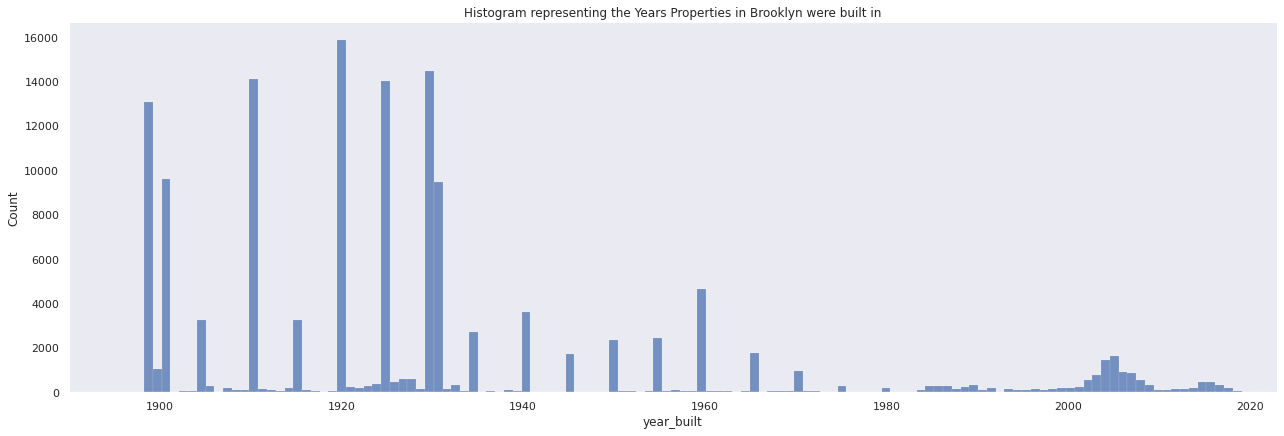

In [ ]:
# Based on the histogram, it is possible to speculate that a lot of historical records collected by the New York City Department of Finance don't have precise yearly approximate
# Logging of the year built parameter for property, with some years being heavily over-represented, in most cases years starting a new decade such as 1900, 1910, 1920, 1940, 1950, and 1960.
# For this reason, this paper proceeds by considering more general and represented time periods consisting of several years as a categorical variable instead of having dummies for every respective year.

sns.displot(df_clean, x="year_built", log_scale=(False), height=6, aspect=3).set(title='Histogram representing the Years Properties in Brooklyn were built in')
plt.xlim([1890, 2023])

In [ ]:
pd.options.display.max_columns = None
df_clean

,index,neighborhood,building_class_category,block,lot,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,day,month_number,month_name,year,age_at_sale,sale_price_log,gross_square_feet_log,price_per_gross_square_foot,price_per_gross_square_foot_logged,price_per_gross_square_foot_ln,outlier,day_of_year,week_of_year,x_norm,cos_x,sin_x,cpi_at_sale,FRM_30,FRM_15,year_built_cate,year_c,year_built_c,month_number_c
0,439352,CYPRESS HILLS,02,3896.0,19.0,122 SUNNYSIDE AVENUE,11207.0,2.0,0.0,2.0,1660,1900.0,1910.0,1.0,B1,345000.0,2004-05-02,2,5,May,2004,94.0,12.751300,7.549609,181.578947,1.689001,5.201691,0.0,123,18,2.111562,-0.514793,0.857315,204.400,6.01,5.35,1910-1920,2004,1910.0,5
1,419876,PROSPECT HEIGHTS,02,1143.0,63.0,131 ST. MARKS AVENUE,11217.0,2.0,0.0,2.0,1570,3200.0,1915.0,1.0,B3,1700000.0,2005-09-30,30,9,September,2005,90.0,14.346139,8.070906,531.250000,1.777513,6.275233,0.0,273,39,4.686638,-0.025748,-0.999668,215.800,5.91,5.48,1910-1920,2005,1915.0,9
2,139142,OCEAN HILL,02,1507.0,14.0,732 DECATUR STREET,11233.0,2.0,0.0,2.0,1800,2268.0,1901.0,1.0,B9,1200000.0,2016-08-11,11,8,August,2016,115.0,13.997832,7.726654,529.100529,1.811629,6.271178,0.0,224,32,3.845447,-0.762354,-0.647161,264.160,3.45,2.76,0-1909,2016,1901.0,8
3,442729,EAST NEW YORK,14,3771.0,1.0,625 BLAKE AVENUE,11207.0,4.0,2.0,6.0,1560,4212.0,1910.0,2.0,S4,175000.0,2004-01-29,29,1,January,2004,94.0,12.072541,8.345693,41.547958,1.446559,3.726848,0.0,29,5,0.497848,0.878612,0.477536,199.900,5.68,4.97,1910-1920,2004,1910.0,1
4,317652,FLATBUSH-EAST,01,4903.0,48.0,147 EAST 32ND STREET,11226.0,1.0,0.0,1.0,2100,1200.0,1920.0,1.0,A1,194000.0,2008-02-06,6,2,February,2008,88.0,12.175613,7.090077,161.666667,1.717275,5.085537,0.0,37,6,0.635185,0.804962,0.593327,231.020,5.67,5.15,1910-1920,2008,1920.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138776,13107,EAST NEW YORK,01,4017.0,141.0,432 ELTON STREET,11208.0,1.0,0.0,1.0,2322,1132.0,1991.0,1.0,A5,640000.0,2021-10-26,26,10,October,2021,30.0,13.369223,7.031741,565.371025,1.901268,6.337482,0.0,299,43,5.132985,0.408304,-0.912846,296.472,3.14,2.37,1956-2022,2021,1991.0,10
138777,354253,SHEEPSHEAD BAY,02,7365.0,63.0,2133 BROWN STREET,11229.0,2.0,0.0,2.0,1800,1863.0,1950.0,1.0,B2,420000.0,2007-04-24,24,4,April,2007,57.0,12.948010,7.529943,225.442834,1.719536,5.418067,0.0,114,17,1.957058,-0.376728,0.926324,225.780,6.16,5.87,1931-1955,2007,1950.0,4
138778,439472,CYPRESS HILLS,02,3950.0,11.0,205 BARBEY STREET,11207.0,2.0,0.0,2.0,2850,2056.0,1901.0,1.0,B2,330000.0,2004-03-03,3,3,March,2004,103.0,12.706848,7.628518,160.505837,1.665703,5.078330,0.0,63,10,1.081532,0.469977,0.882679,203.400,5.59,4.88,0-1909,2004,1901.0,3
138779,433012,BROWNSVILLE,29,3863.0,15.0,148 NEW LOTS AVENUE,11212.0,0.0,4.0,4.0,6608,3000.0,1930.0,4.0,G9,260000.0,2004-10-06,6,10,October,2004,74.0,12.468437,8.006368,86.666667,1.557315,4.462069,0.0,280,41,4.806808,0.094279,-0.995546,207.300,5.82,5.24,1921-1930,2004,1930.0,10


# OLS Regression Model Attempts


Checking for Multicollinearity Of Continous Variables prior to proceeding with modelling

In [ ]:
df_clean['year_c'] = df_clean['year'].astype(str)
df_clean['year_built_c'] = df_clean['year_built'].astype(str)
df_clean['month_number_c'] = df_clean['month_number'].astype(str)
df_clean['tax_class_at_time_of_sale'] = df_clean['tax_class_at_time_of_sale'].astype(str)
df_clean['zip_code'] = df_clean['zip_code'].astype(str)

In [ ]:
%%capture
reg_instr_var = df_clean[['gross_square_feet_log','residential_units','commercial_units','FRM_15','cos_x','cpi_at_sale','sin_x','year']]#.join(dummies)
features = "+".join(reg_instr_var.columns)

# get y and X dataframes based on this regression:
y_, X_ = dmatrices('sale_price_log ~' + features, df_clean, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]
vif["features"] = X_.columns

In [ ]:
vif.round(2)

,VIF Factor,features
0,6066917.97,Intercept
1,1.36,gross_square_feet_log
2,1.29,residential_units
3,1.05,commercial_units
4,3.46,FRM_15
5,1.03,cos_x
6,47.42,cpi_at_sale
7,1.10,sin_x
8,51.70,year


In [ ]:
df_clean.drop(['index'], inplace=True, axis=1)

In [ ]:
pd.options.display.max_columns=None
df_clean

,neighborhood,building_class_category,block,lot,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,day,month_number,month_name,year,age_at_sale,sale_price_log,gross_square_feet_log,price_per_gross_square_foot,price_per_gross_square_foot_logged,price_per_gross_square_foot_ln,outlier,day_of_year,week_of_year,x_norm,cos_x,sin_x,cpi_at_sale,FRM_30,FRM_15,year_built_cate,year_c,year_built_c,month_number_c
0,BATH BEACH,01,6364.0,74.0,72 BAY 14TH STREET,11214.0,1.0,0.0,1.0,2492,972.0,1950.0,1.0,A5,890000.0,2021-08-10,10,8,August,2021,71.0,13.698977,6.879356,915.637860,1.991317,6.819621,0.0,222,32,3.811112,-0.784120,-0.620609,293.927,2.87,2.15,1931-1955,2021,1950.0,8
1,BATH BEACH,01,6367.0,24.0,8645 BAY 16 STREE,11214.0,1.0,0.0,1.0,1571,1456.0,1935.0,1.0,A9,925000.0,2021-03-11,11,3,March,2021,86.0,13.737549,7.283448,635.302198,1.886133,6.454101,0.0,70,10,1.201702,0.360771,0.932655,287.481,3.05,2.38,1931-1955,2021,1935.0,3
2,BATH BEACH,01,6380.0,73.0,8672 BAY PARKWAY,11214.0,1.0,1.0,2.0,1740,2124.0,1960.0,1.0,S1,990000.0,2021-02-22,22,2,February,2021,61.0,13.805460,7.661056,466.101695,1.802031,6.144404,0.0,53,8,0.909860,0.613856,0.789418,286.474,2.97,2.34,1956-2022,2021,1960.0,2
3,BATH BEACH,01,6410.0,54.0,122 BAY 26TH STREET,11214.0,1.0,0.0,1.0,9667,3972.0,1901.0,1.0,A1,2800000.0,2021-10-31,31,10,October,2021,120.0,14.845130,8.287025,704.934542,1.791370,6.558105,0.0,304,43,5.218821,0.485060,-0.874481,296.472,3.14,2.37,0-1909,2021,1901.0,10
4,BATH BEACH,01,6425.0,11.0,241 BAY 7TH STREET,11228.0,1.0,0.0,1.0,1452,1188.0,1935.0,1.0,A5,870000.0,2021-04-30,30,4,April,2021,86.0,13.676248,7.080026,732.323232,1.931666,6.596222,0.0,120,17,2.060061,-0.469977,0.882679,289.493,2.98,2.31,1931-1955,2021,1935.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174168,WYCKOFF HEIGHTS,30,3176.0,36.0,6 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2165,1780.0,1931.0,4.0,E9,192000.0,2003-08-29,29,8,August,2003,72.0,12.165251,7.484369,107.865169,1.625421,4.680882,0.0,241,35,4.137289,-0.543919,-0.839138,199.100,6.32,5.66,1931-1955,2003,1931.0,8
174169,WYCKOFF HEIGHTS,30,3177.0,2.0,17 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2357,4713.0,1931.0,4.0,E9,225000.0,2003-12-29,29,12,December,2003,72.0,12.323856,8.458080,47.740293,1.457051,3.865776,0.0,363,1,6.231684,0.998674,-0.051479,199.300,5.85,5.24,1931-1955,2003,1931.0,12
174170,WYCKOFF HEIGHTS,30,3177.0,2.0,17 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2357,4713.0,1931.0,4.0,E9,225000.0,2003-12-29,29,12,December,2003,72.0,12.323856,8.458080,47.740293,1.457051,3.865776,0.0,363,1,6.231684,0.998674,-0.051479,199.300,5.85,5.15,1931-1955,2003,1931.0,12
174171,WYCKOFF HEIGHTS,30,3177.0,2.0,17 WYCKOFF AVENUE,11237.0,0.0,1.0,1.0,2357,4713.0,1931.0,4.0,E9,200000.0,2003-09-24,24,9,September,2003,72.0,12.206073,8.458080,42.435816,1.443126,3.747993,0.0,267,39,4.583635,-0.128398,-0.991723,199.600,5.98,5.30,1931-1955,2003,1931.0,9


In [ ]:
from google.colab import files
df_clean.to_csv('df_clean_comp.csv') 

Model #1 - Baseline OLS without implementation of Time Effects (Year or Season Seasonality) using 80%/20% for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','building_class_at_time_of_sale','year_built_c']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

X = pd.DataFrame(df_reg)
Y = pd.DataFrame(df_clean['sale_price_log'])
X_const = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_const, Y, test_size=0.2, random_state=37)

model_1 = sm.OLS(Y_train, X_train).fit()
Y_predictions = model_1.predict(X_test) 

print_model = model_1.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         sale_price_log   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     328.9
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:18:25   Log-Likelihood:            -1.2145e+05
No. Observations:              139060   AIC:                         2.436e+05
Df Residuals:                  138689   BIC:                         2.473e+05
Df Model:                         370                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept=False)
folds = KFold(n_splits = 5, shuffle = True, random_state = 37)
scores_r2 = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='r2', cv=folds)
scores_rmse = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='neg_mean_squared_error', cv=folds)

In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.4618158584808505
CV RMSE of Model:  0.5824659887582356


In [ ]:
#Root Mean Square Error of Model 1 When Testing 'Predicted Y' vs 'Test Y' values (OLS without Time Effects)

residuals_mdl_1_abs = abs(Y_predictions.values - (Y_test['sale_price_log']).values) 
residuals_mdl_1 = (Y_predictions.values - (Y_test['sale_price_log']).values) 

print('Sum of residuals (+ overpricing / - underpricing):', (residuals_mdl_1))
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))
print('R-squared statistic value:', (r2_score(Y_test, Y_predictions)))

Sum of residuals (+ overpricing / - underpricing): [ 0.62956355 -0.96735486  0.33218068 ...  0.28459241  0.22284738
 -0.3252868 ]
Root Mean Square Error: 0.5843246145852243
R-squared statistic value: 0.4675039233025007


Model #2.a - OLS with Year Time Effects using 80/20 for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','building_class_at_time_of_sale','year_built_c','year_c']]
dummies = pd.get_dummies(data=df_dummies, drop_first=True)
df_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

X = pd.DataFrame(df_reg)
Y = pd.DataFrame(df_clean['sale_price_log'])
X_const = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_const, Y, test_size=0.20, random_state=37)

model_2a = sm.OLS(Y_train, X_train).fit()
Y_predictions = model_2a.predict(X_test) 

print_model = model_2a.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         sale_price_log   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     577.8
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:42:21   Log-Likelihood:                -98373.
No. Observations:              139060   AIC:                         1.975e+05
Df Residuals:                  138671   BIC:                         2.014e+05
Df Model:                         388                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
lm = LinearRegression(fit_intercept=False)
folds = KFold(n_splits = 5, shuffle = True, random_state = 37)
scores_r2 = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='r2', cv=folds)
scores_rmse = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='neg_mean_squared_error', cv=folds)

In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.613224374810612
CV RMSE of Model:  0.4937954372994855


In [ ]:
#Root Mean Square Error of Model 1 When Testing 'Predicted Y' vs 'Test Y' values (OLS without Time Effects)

residuals_mdl_2a_abs = abs(Y_predictions.values - (Y_test['sale_price_log']).values) 
residuals_mdl_2a = (Y_predictions.values - (Y_test['sale_price_log']).values) 

print('Sum of residuals (+ overpricing / - underpricing):', (residuals_mdl_1))
print('R-squared statistic value:', (r2_score(Y_test, Y_predictions)))
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Sum of residuals (+ overpricing / - underpricing): [ 0.62956355 -0.96735486  0.33218068 ...  0.28459241  0.22284738
 -0.3252868 ]
R-squared statistic value: 0.6208954673970024
Root Mean Square Error: 0.49303240381607655


Mann-Whitney U comparing the residuals of Model 1 and Model 2a

In [ ]:
# Test For Equal Residual Variances

print(np.var(residuals_mdl_1), np.var(residuals_mdl_2a))
print(np.var(residuals_mdl_1_abs), np.var(residuals_mdl_2a_abs))

0.34143039031010664 0.24307512644865323
0.15660748877402067 0.12565616345185682


In [ ]:
from scipy.stats import mannwhitneyu
h1a = stats.mannwhitneyu(residuals_mdl_1, residuals_mdl_2a, alternative = 'greater')

In [ ]:
h1a

MannwhitneyuResult(statistic=612925820.0, pvalue=0.0005598627934022659)

In [ ]:
# Since Difference between variances is larger than a factor of 1:4, equal residual variance cannot be assumed

print(stats.ttest_ind(residuals_mdl_1, residuals_mdl_2a, equal_var = False))
print(stats.ttest_ind(residuals_mdl_1_abs, residuals_mdl_2a_abs, equal_var = False))

Ttest_indResult(statistic=-0.05067832500249859, pvalue=0.9595819982941)
Ttest_indResult(statistic=30.61737541224831, pvalue=1.720843446028145e-204)


Model #2.b - OLS with Seasonality Time Effects using 80/20 for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','building_class_at_time_of_sale','year_built_c']]
dummies = pd.get_dummies(data=df_dummies, drop_first=True)
df_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units','sin_x','cos_x']].join(dummies)

X = pd.DataFrame(df_reg)
Y = pd.DataFrame(df_clean['sale_price_log'])
X_const = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_const, Y, test_size=0.20, random_state=37)

model_2b = sm.OLS(Y_train, X_train).fit()
Y_predictions = model_2b.predict(X_test) 

print_model = model_2b.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         sale_price_log   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     327.5
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:19:02   Log-Likelihood:            -1.2142e+05
No. Observations:              139060   AIC:                         2.436e+05
Df Residuals:                  138687   BIC:                         2.473e+05
Df Model:                         372                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
lm = LinearRegression(fit_intercept=False)
folds = KFold(n_splits = 5, shuffle = True, random_state = 37)
scores_r2 = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='r2', cv=folds)
scores_rmse = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='neg_mean_squared_error', cv=folds)

In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.46201982769974964
CV RMSE of Model:  0.5823556071286486


In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.4621293423421351
CV RMSE of Model:  0.5822959053974884


In [ ]:
#Root Mean Square Error of Model 1 When Testing 'Predicted Y' vs 'Test Y' values (OLS without Time Effects)

residuals_mdl_2b_abs = abs(Y_predictions.values - (Y_test['sale_price_log']).values) 
residuals_mdl_2b = (Y_predictions.values - (Y_test['sale_price_log']).values) 

print('Sum of residuals (+ overpricing / - underpricing):', (residuals_mdl_2b))
print('R-squared statistic value:', (r2_score(Y_test, Y_predictions)))
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Sum of residuals (+ overpricing / - underpricing): [ 0.63720595 -0.95181088  0.3588142  ...  0.26388018  0.23932489
 -0.31811897]
R-squared statistic value: 0.46787345002143954
Root Mean Square Error: 0.5841218327806034


Mann-Whitney U comparing the residuals of Model 1 and Model 2a

In [ ]:
# Test For Equal Residual Variances

print(np.var(residuals_mdl_1), np.var(residuals_mdl_2b))
print(np.var(residuals_mdl_1_abs), np.var(residuals_mdl_2b_abs))

0.34143039031010664 0.34119211786329906
0.15660748877402067 0.15646043189859374


In [ ]:
from scipy.stats import mannwhitneyu
h1b = stats.mannwhitneyu(residuals_mdl_1, residuals_mdl_2b, alternative = 'greater')

In [ ]:
h1b

MannwhitneyuResult(statistic=604106678.0, pvalue=0.5295110444463924)

Model #3 - OLS Utilising all Time-varying features and Effects using 80/20 for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','building_class_at_time_of_sale','year_built_c','year_c']]
dummies = pd.get_dummies(data=df_dummies, drop_first=True)
df_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units','FRM_15','sin_x','cos_x']].join(dummies)

X = pd.DataFrame(df_reg)
Y = pd.DataFrame(df_clean['sale_price_log'])
X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

model_3 = sm.OLS(Y_train, X_train).fit()
Y_predictions = model_3.predict(X_test) 

print_model = model_3.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         sale_price_log   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     574.1
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:49:59   Log-Likelihood:                -98314.
No. Observations:              139060   AIC:                         1.974e+05
Df Residuals:                  138668   BIC:                         2.013e+05
Df Model:                         391                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
lm = LinearRegression(fit_intercept=False)
folds = KFold(n_splits = 5, shuffle = True, random_state = 37)
scores_r2 = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='r2', cv=folds)
scores_rmse = cross_val_score(lm, pd.DataFrame(X_train), pd.DataFrame(Y_train['sale_price_log']), scoring='neg_mean_squared_error', cv=folds)

In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.6136622283331329
CV RMSE of Model:  0.493515785473765


In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.6135289138835885
CV RMSE of Model:  0.493601148484255


In [ ]:
#Root Mean Square Error of Model 1 When Testing 'Predicted Y' vs 'Test Y' values (OLS without Time Effects)

residuals_mdl_3_abs = abs(Y_predictions.values - (Y_test['sale_price_log']).values) 
residuals_mdl_3 = (Y_predictions.values - (Y_test['sale_price_log']).values) 

print('Sum of residuals (+ overpricing / - underpricing):', (residuals_mdl_1))
print('R-squared statistic value:', (r2_score(Y_test, Y_predictions)))
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Sum of residuals (+ overpricing / - underpricing): [ 0.62956355 -0.96735486  0.33218068 ...  0.28459241  0.22284738
 -0.3252868 ]
R-squared statistic value: 0.6213280473953979
Root Mean Square Error: 0.49275103441415335


In [ ]:
residuals_mdl_3_abs = abs(Y_predictions.values - (Y_test['sale_price_log']).values) 
residuals_mdl_3 = (Y_predictions.values - (Y_test['sale_price_log']).values) 

print('Sum of residuals (+ overpricing / - underpricing):', (residuals_mdl_3))
print('R-squared statistic value:', (r2_score(Y_test, Y_predictions)))
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Sum of residuals (+ overpricing / - underpricing): [ 0.24667003 -0.82540407  0.15182028 ... -0.08277539 -0.33821039
 -0.07118003]
R-squared statistic value: 0.6213276528773222
Root Mean Square Error: 0.49275129109957455


# Lasso Regression Model Attempts

Model #4 - Lasso Regression without Time Effects using 80/20 for Train and Test dataset split

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import datasets

data = datasets.load_boston()
x_data = data.data
y_data = data.target

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5, random_state=0, max_iter=10000)
lassocv.fit(train_x, train_y)
al = lassocv.alpha_
print(al)

lasso = Lasso(alpha=al)
lasso.fit(train_x, train_y)
print(lasso.score(test_x, test_y)*100)

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','building_class_at_time_of_sale','year_built_c']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_lasso_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

Y = df_clean['sale_price_log']
X = pd.DataFrame(df_lasso_reg)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

lasso_model_1 = Lasso().fit(X_train, Y_train)

In [ ]:
#Root Mean Square Error of Model 1 When Testing 'Predicted Y' vs 'Test Y' values (Lasso Without Time Effects)

Y_predict = lasso_model_1.predict(X_test)
np.sqrt(mean_squared_error(Y_test,Y_predict))

0.7773161963510257

In [ ]:
lasso_tuned_model_1 = Lasso().set_params(alpha = 0.0001).fit(X_train, Y_train)

Y_predict_alpha_tuned = lasso_tuned_model_1.predict(X_test)

print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predict_alpha_tuned))))

Root Mean Square Error: 0.5860380885102446


In [ ]:
#Root Mean Square Error of Model 5a When Testing 'Predicted Y' vs 'Test Y' values (OLS with Year Time Effects)

residuals_mdl_4_abs = abs(Y_predict_alpha_tuned - (Y_test))
residuals_mdl_4 = (Y_predict_alpha_tuned - (Y_test))

In [ ]:
#R-squared Value for Model 1 When Testing 'Alpha Adjusted Predicted Y' vs 'Test Y' values (Lasso Without Time Effects)

print('R-squared statistic value:', (r2_score(Y_test, Y_predict_alpha_tuned)))

R-squared statistic value: 0.4643763606169613


Model #5a - Lasso Regression with Year Effect using 80/20 for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','building_class_at_time_of_sale','year_built_c','year_c']]
dummies = pd.get_dummies(data=df_dummies, drop_first=True)
df_lasso_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

Y = pd.DataFrame(df_clean['sale_price_log'])
X = pd.DataFrame(df_lasso_reg)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

lasso_model_2a = Lasso().fit(X_train, Y_train)

In [ ]:
#Root Mean Square Error of Model 5a When Testing 'Predicted Y' vs 'Test Y' values (Lasso With Year Effects)

Y_predict = lasso_model_2a.predict(X_test)
np.sqrt(mean_squared_error(Y_test, Y_predict))

0.7773161963510257

In [ ]:
lasso_tuned_model_2a = Lasso().set_params(alpha = 0.0001).fit(X_train, Y_train)

Y_predict_alpha_tuned = lasso_tuned_model_2a.predict(X_test)

print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predict_alpha_tuned))))

Root Mean Square Error: 0.4950314422454886


In [ ]:
#R-squared Value for Model 5a When Testing 'Alpha Adjusted Predicted Y' vs 'Test Y' values (Lasso With Year Effects)

print('R-squared statistic value:', (r2_score(Y_test, Y_predict_alpha_tuned)))

R-squared statistic value: 0.6178150171324408


In [ ]:
#Root Mean Square Error of Model 5a When Testing 'Predicted Y' vs 'Test Y' values (OLS with Year Time Effects)

residuals_mdl_5a_abs = abs(Y_predict_alpha_tuned - (Y_test['sale_price_log']))
residuals_mdl_5a = (Y_predict_alpha_tuned - (Y_test['sale_price_log']))

In [ ]:
# Test For Equal Residual Variances

print(np.var(residuals_mdl_4), np.var(residuals_mdl_5a))
print(np.var(residuals_mdl_4_abs), np.var(residuals_mdl_5a_abs))

0.3434365443787945 0.24505087213068283
0.15688336980125248 0.12635416952936493


In [ ]:
h2a = mannwhitneyu(residuals_mdl_4, residuals_mdl_5a)
h2a

MannwhitneyuResult(statistic=596041618.0, pvalue=0.0008990438842037309)

In [ ]:
# Since Difference between variances is larger than a factor of 1:4, equal residual variance cannot be assumed

print(stats.ttest_ind(residuals_mdl_4, residuals_mdl_5a, equal_var = False))
print(stats.ttest_ind(residuals_mdl_4_abs, residuals_mdl_5a_abs, equal_var = False))

Ttest_indResult(statistic=-0.06530483496755893, pvalue=0.947931485817685)
Ttest_indResult(statistic=30.616633482055036, pvalue=1.7576641004405037e-204)


Model #5b - Lasso Regression with Seasonality Time Effect using 80/20 for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','building_class_at_time_of_sale','year_built_c']]
dummies = pd.get_dummies(data=df_dummies, drop_first=True)
df_lasso_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units','sin_x','cos_x']].join(dummies)

Y = pd.DataFrame(df_clean['sale_price_log'])
X = pd.DataFrame(df_lasso_reg)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

lasso_model_2b = Lasso().fit(X_train, Y_train)

In [ ]:
#Root Mean Square Error of Model 5b When Testing 'Predicted Y' vs 'Test Y' values (Lasso With Seasonality Effects)

Y_predict = lasso_model_2b.predict(X_test)
np.sqrt(mean_squared_error(Y_test, Y_predict))

0.7773161963510257

In [ ]:
lasso_tuned_model_2b = Lasso().set_params(alpha = 0.0001).fit(X_train, Y_train)

Y_predict_alpha_tuned = lasso_tuned_model_2b.predict(X_test)

print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predict_alpha_tuned))))

Root Mean Square Error: 0.5858476200034624


In [ ]:
#R-squared Value for Model 5a When Testing 'Alpha Adjusted Predicted Y' vs 'Test Y' values (Lasso With Year Effects)

print('R-squared statistic value:', (r2_score(Y_test, Y_predict_alpha_tuned)))

R-squared statistic value: 0.4647244706053695


In [ ]:
#Root Mean Square Error of Model 5a When Testing 'Predicted Y' vs 'Test Y' values (OLS with Year Time Effects)

residuals_mdl_5b_abs = abs(Y_predict_alpha_tuned - (Y_test['sale_price_log']))
residuals_mdl_5b = (Y_predict_alpha_tuned - (Y_test['sale_price_log']))

In [ ]:
# Test For Equal Residual Variances

print(np.var(residuals_mdl_4), np.var(residuals_mdl_5b))
print(np.var(residuals_mdl_4_abs), np.var(residuals_mdl_5b_abs))

0.3434365443787945 0.34321279428119617
0.15688336980125248 0.1567591803533612


In [ ]:
h2b = mannwhitneyu(residuals_mdl_4, residuals_mdl_5b)
h2b

MannwhitneyuResult(statistic=604201276.0, pvalue=0.4847269123065781)

In [ ]:
h1a

MannwhitneyuResult(statistic=595663888.0, pvalue=0.0005484025843211762)

In [ ]:
h1b

MannwhitneyuResult(statistic=604199282.0, pvalue=0.48442653325283425)

In [ ]:
h2a

MannwhitneyuResult(statistic=596041618.0, pvalue=0.0008990438842037309)

In [ ]:
# Since Difference between variances is larger than a factor of 1:4, equal residual variance cannot be assumed

print(stats.ttest_ind(residuals_mdl_4, residuals_mdl_5b, equal_var = True))
print(stats.ttest_ind(residuals_mdl_4_abs, residuals_mdl_5b_abs, equal_var = True))

Ttest_indResult(statistic=-0.02923124726992712, pvalue=0.9766802440567294)
Ttest_indResult(statistic=0.038166516945078346, pvalue=0.9695550266184546)


Model #6 - Lasso Regression with All Time Effect using 80/20 for Train and Test dataset split

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','building_class_at_time_of_sale','year_built_c','year_c']]
dummies = pd.get_dummies(data=df_dummies, drop_first=True)
df_lasso_reg = df_clean[['gross_square_feet_log','residential_units','commercial_units','sin_x','cos_x','FRM_15']].join(dummies)

Y = pd.DataFrame(df_clean['sale_price_log'])
X = pd.DataFrame(df_lasso_reg)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

lasso_model_3 = Lasso().fit(X_train, Y_train)

In [ ]:
#Root Mean Square Error of Model 6 When Testing 'Predicted Y' vs 'Test Y' values (Lasso With All Time Effects)

Y_predict = lasso_model_3.predict(X_test)
np.sqrt(mean_squared_error(Y_test, Y_predict))

0.7773161963510257

In [ ]:
lasso_tuned = Lasso().set_params(alpha = 0.0001).fit(X_train, Y_train)

Y_predict_alpha_tuned = lasso_tuned.predict(X_test)

print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predict_alpha_tuned))))

Root Mean Square Error: 0.494852598829398


In [ ]:
#R-squared Value for Model 6 When Testing 'Alpha Adjusted Predicted Y' vs 'Test Y' values (Lasso With All Time Effects)

print('R-squared statistic value:', (r2_score(Y_test, Y_predict_alpha_tuned)))

R-squared statistic value: 0.618091116447418


# Random Forest Model Attempts

Model #7 - Baseline Random Forest Model Without Time Effects

In [ ]:
df_dummies= df_clean[['zip_code','year_built_cate','building_class_at_time_of_sale']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 150 decision trees
rf_model_baseline = RandomForestRegressor(n_estimators = 150, random_state = 37, max_depth=20)
rf_model_baseline.fit(X_train, Y_train)

RandomForestRegressor(max_depth=30, n_estimators=150, random_state=37)

In [ ]:
rf = RandomForestRegressor(n_estimators = 150, random_state = 37, max_depth=20)
scoring = ["r2", "neg_mean_squared_error"]

folds = KFold(n_splits = 5, shuffle = True, random_state = 37)
scores_r2 = cross_val_score(rf, X_train, Y_train, scoring = scoring, cv=folds)
scores_rmse = cross_val_score(rf, X_train, Y_train, scoring='neg_mean_squared_error', cv=folds)

In [ ]:
print("CV r2 of Model: ", np.mean(scores_r2))
print("CV RMSE of Model: ", np.sqrt(abs(np.mean(scores_rmse))))

CV r2 of Model:  0.6136622283331329
CV RMSE of Model:  0.493515785473765


In [ ]:
#Root Mean Square Error of Model 1 When Testing 'Predicted Y' vs 'Test Y' values (OLS without Time Effects)

residuals_mdl_1_abs = abs(Y_predictions.values - (Y_test['sale_price_log']).values) 
residuals_mdl_1 = (Y_predictions.values - (Y_test['sale_price_log']).values) 

print('Sum of residuals (+ overpricing / - underpricing):', (residuals_mdl_1))
print('R-squared statistic value:', (r2_score(Y_test, Y_predictions)))
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Sum of residuals (+ overpricing / - underpricing): [ 0.62956355 -0.96735486  0.33218068 ...  0.28459241  0.22284738
 -0.3252868 ]
R-squared statistic value: 0.6213280473953979
Root Mean Square Error: 0.49275103441415335


In [ ]:
# Feature importance calculations

importances = list(rf_model_baseline.feature_importances_)
regressor_importances = [(X, round(importance, 3)) for X, importance in zip(regressor_list, importances)]

regressor_importances = sorted(regressor_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in regressor_importances];

Variable: gross_square_feet_log Importance: 0.614
Variable: residential_units    Importance: 0.059
Variable: zip_code_11215.0     Importance: 0.03
Variable: zip_code_11207.0     Importance: 0.021
Variable: commercial_units     Importance: 0.02
Variable: zip_code_11208.0     Importance: 0.019
Variable: zip_code_11217.0     Importance: 0.018
Variable: tax_class_at_time_of_sale_2.0 Importance: 0.015
Variable: zip_code_11203.0     Importance: 0.014
Variable: zip_code_11236.0     Importance: 0.014
Variable: zip_code_11231.0     Importance: 0.013
Variable: year_built_cate_1910-1920 Importance: 0.013
Variable: year_built_cate_1956-2022 Importance: 0.013
Variable: zip_code_11212.0     Importance: 0.012
Variable: zip_code_11233.0     Importance: 0.011
Variable: zip_code_11221.0     Importance: 0.01
Variable: year_built_cate_1921-1930 Importance: 0.01
Variable: year_built_cate_1931-1955 Importance: 0.01
Variable: zip_code_11234.0     Importance: 0.008
Variable: zip_code_11249.0     Importance: 0

Model #8 - Trail Random Forest Model With Time Effects

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','building_class_at_time_of_sale','year_built_c','year_c']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units','cpi_at_sale','FRM_15','cos_x','sin_x','age_at_sale']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 250 decision trees
rf_model_1 = RandomForestRegressor(n_estimators = 250, random_state = 37, max_depth=6)
rf_model_1.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=250, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_1.predict(X_test)

# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Root Mean Square Error: 0.6072689079405603


In [ ]:
# Feature importance calculations

importances = list(rf_model_1.feature_importances_)
regressor_importances = [(X, round(importance, 3)) for X, importance in zip(regressor_list, importances)]

regressor_importances = sorted(regressor_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in regressor_importances];

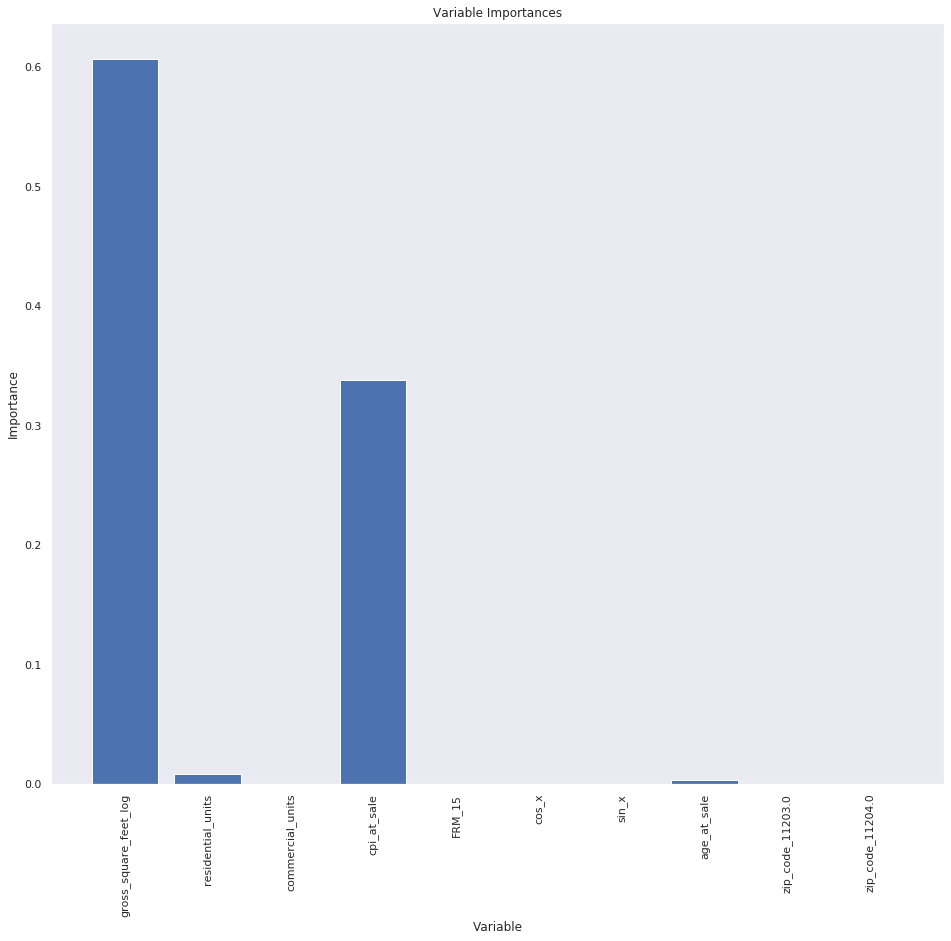

In [ ]:
# Visualising feature performance from rf model 1
x_val= list(range(len(importances[0:10])))
plt.bar(x_val, importances[0:10], orientation = 'vertical')
plt.xticks(x_val, regressor_list[0:10], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
from sklearn.tree import export_graphviz
import pydot

tree = rf_model_1.estimators_[5]

# Creating an Export of a tree example in dot format
export_graphviz(tree, out_file = 'rf_tree.dot', feature_names = regressor_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('rf_tree.dot')
graph.write_png('rf_tree.png')

Model #8.a - Random Forest Model With Year Effects

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','year_built_cate','year_c']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 600 decision trees
rf_model_2a = RandomForestRegressor(n_estimators = 600, random_state = 37, max_depth=24)
rf_model_2a.fit(X_train, Y_train)

RandomForestRegressor(max_depth=24, n_estimators=600, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_2a.predict(X_test)
# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Root Mean Square Error: 0.5555790293700233


In [ ]:
# Feature importance calculations

importances = list(rf_model_2a.feature_importances_)
regressor_importances = [(X, round(importance, 3)) for X, importance in zip(regressor_list, importances)]

regressor_importances = sorted(regressor_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in regressor_importances];

Variable: gross_square_feet_log Importance: 0.475
Variable: year_c_2021          Importance: 0.046
Variable: residential_units    Importance: 0.04
Variable: year_c_2018          Importance: 0.032
Variable: year_c_2019          Importance: 0.027
Variable: year_c_2020          Importance: 0.025
Variable: year_c_2017          Importance: 0.023
Variable: zip_code_11215.0     Importance: 0.022
Variable: year_c_2016          Importance: 0.021
Variable: year_c_2015          Importance: 0.018
Variable: zip_code_11208.0     Importance: 0.017
Variable: zip_code_11207.0     Importance: 0.016
Variable: year_c_2004          Importance: 0.016
Variable: zip_code_11217.0     Importance: 0.013
Variable: commercial_units     Importance: 0.012
Variable: zip_code_11203.0     Importance: 0.012
Variable: zip_code_11236.0     Importance: 0.012
Variable: zip_code_11212.0     Importance: 0.011
Variable: zip_code_11231.0     Importance: 0.01
Variable: year_c_2014          Importance: 0.01
Variable: zip_code_112

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','year_built_cate']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units','year']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 600 decision trees
rf_model_2aa = RandomForestRegressor(n_estimators = 600, random_state = 37, max_depth=24)
rf_model_2aa.fit(X_train, Y_train)

RandomForestRegressor(max_depth=24, n_estimators=600, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_2aa.predict(X_test)
# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Root Mean Square Error: 0.5414668500301774


In [ ]:
importances = list(rf_model_2aa.feature_importances_)
regressor_importances = [(X, round(importance, 3)) for X, importance in zip(regressor_list, importances)]

regressor_importances = sorted(regressor_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in regressor_importances];

Variable: gross_square_feet_log Importance: 0.486
Variable: year                 Importance: 0.238
Variable: residential_units    Importance: 0.039
Variable: zip_code_11215.0     Importance: 0.02
Variable: zip_code_11207.0     Importance: 0.015
Variable: zip_code_11208.0     Importance: 0.015
Variable: commercial_units     Importance: 0.013
Variable: zip_code_11217.0     Importance: 0.012
Variable: zip_code_11203.0     Importance: 0.011
Variable: zip_code_11236.0     Importance: 0.011
Variable: zip_code_11212.0     Importance: 0.01
Variable: zip_code_11231.0     Importance: 0.01
Variable: year_built_cate_1910-1920 Importance: 0.01
Variable: year_built_cate_1956-2022 Importance: 0.009
Variable: zip_code_11233.0     Importance: 0.008
Variable: year_built_cate_1921-1930 Importance: 0.008
Variable: zip_code_11221.0     Importance: 0.007
Variable: zip_code_11234.0     Importance: 0.007
Variable: year_built_cate_1931-1955 Importance: 0.007
Variable: tax_class_at_time_of_sale_2.0 Importance: 

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','year_built_cate']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units','year']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 600 decision trees
rf_model_2aa_nl = RandomForestRegressor(n_estimators = 600, random_state = 37, max_depth=24)
rf_model_2aa_nl.fit(X_train, Y_train)

RandomForestRegressor(max_depth=24, n_estimators=600, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_2aa_nl.predict(X_test)
# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))
print('Accuracy Of Random Forest Model:', rf_model_2aa_nl.score(X_test, Y_test))

Root Mean Square Error: 1807436.6685946789
Accuracy Of Random Forest Model: 0.6159035712766814


Model #8b - Random Forest Model Featuring Seasonality Effects

In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','year_built_cate']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units','sin_x','cos_x']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 600 decision trees
rf_model_2b = RandomForestRegressor(n_estimators = 600, random_state = 37, max_depth=24)
rf_model_2b.fit(X_train, Y_train)

RandomForestRegressor(max_depth=24, n_estimators=600, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_2b.predict(X_test)
# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Root Mean Square Error: 0.6338398730747105


In [ ]:
df_dummies= df_clean[['zip_code','tax_class_at_time_of_sale','year_built_cate','month_number_c']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 600 decision trees
rf_model_2bb = RandomForestRegressor(n_estimators = 600, random_state = 37, max_depth=24)
rf_model_2bb.fit(X_train, Y_train)

RandomForestRegressor(max_depth=24, n_estimators=600, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_2bb.predict(X_test)

# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))

Root Mean Square Error: 0.6393139299138326


Model #9 - Random Forest including All Time Effect features

In [ ]:
df_dummies= df_clean[['zip_code','building_class_at_time_of_sale','year_built_cate']]
dummies = pd.get_dummies(data = df_dummies, drop_first=True)
df_rf = df_clean[['gross_square_feet_log','residential_units','commercial_units','year','FRM_15','sin_x','cos_x']].join(dummies)

# Assign Our Dependent Variable Sale_price_log as an array
Y = np.array(df_clean['sale_price_log'])

# Keeping All Regressor Names and Converting them into array form
regressor_list = list(df_rf.columns)
X = np.array(df_rf)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=37)

# Establish model with 500 decision trees
rf_model_3 = RandomForestRegressor(n_estimators = 150, random_state = 37, max_depth=20)
rf_model_3.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=37)

In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_3.predict(X_test)

# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))
print('Accuracy Of Random Forest Model:', rf_model_3.score(X_test, Y_test))

Root Mean Square Error: 0.48656890217959575
Accuracy Of Random Forest Model: 0.6307701982740821


In [ ]:
# Using rf model to predict y values on the test set
Y_predictions = rf_model_3.predict(X_test)

# Print out the Root Mean Squared Error (RMSE)
print('Root Mean Square Error:', (np.sqrt(mean_squared_error(Y_test, Y_predictions))))
print('Accuracy Of Random Forest Model:', rf_model_3.score(X_test, Y_test))

Root Mean Square Error: 0.48508220798387885
Accuracy Of Random Forest Model: 0.6330230885830662


In [ ]:
np.mean(Y_test)

13.392673908159132

In [ ]:
# Feature importance calculations
importances = list(rf_model_3.feature_importances_)
regressor_list = list(df_rf.columns)
regressor_importances = [(X, round(importance, 3)) for X, importance in zip(regressor_list, importances)]

regressor_importances = sorted(regressor_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in regressor_importances];

Variable: gross_square_feet_log Importance: 0.443
Variable: year                 Importance: 0.223
Variable: FRM_15               Importance: 0.032
Variable: cos_x                Importance: 0.029
Variable: sin_x                Importance: 0.028
Variable: zip_code_11215.0     Importance: 0.022
Variable: residential_units    Importance: 0.02
Variable: zip_code_11207.0     Importance: 0.016
Variable: zip_code_11208.0     Importance: 0.016
Variable: zip_code_11217.0     Importance: 0.012
Variable: zip_code_11203.0     Importance: 0.011
Variable: zip_code_11231.0     Importance: 0.011
Variable: zip_code_11236.0     Importance: 0.011
Variable: zip_code_11212.0     Importance: 0.01
Variable: zip_code_11233.0     Importance: 0.007
Variable: zip_code_11234.0     Importance: 0.007
Variable: zip_code_11221.0     Importance: 0.006
Variable: commercial_units     Importance: 0.005
Variable: zip_code_11238.0     Importance: 0.004
Variable: building_class_at_time_of_sale_A1 Importance: 0.004
Variable

In [ ]:
imp_data={'Variable':['Gross Square Feet(ln)','Year','Zip Code','Building Class','FRM 15','cosine value','sin value','Res. units','Commerc. Units','Year Built'],'Importance Score':[0.443,0.223,0.147,0.045,0.032,0.029,0.028,0.02,0.005,0.028]}

df_rfimp_graph =pd.DataFrame(imp_data)

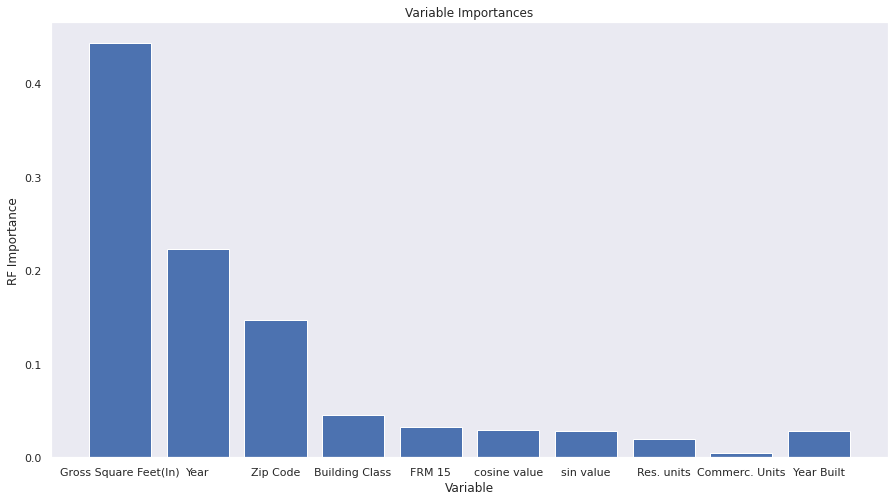

In [ ]:
sns.set(style='dark')
plt.rcParams["figure.figsize"] = (15,8)
x_val= list(range(len(importances)))
plt.bar(df_rfimp_graph['Variable'],df_rfimp_graph['Importance Score'], orientation = 'vertical')
plt.xticks(df_rfimp_graph['Variable'], (df_rfimp_graph['Variable']))
plt.ylabel('RF Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Attempt at Isolation Forest and loose code

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_clean.head(2)

In [ ]:
from sklearn.ensemble import IsolationForest

df_IF = df_clean[['gross_square_feet','sale_price','zip_code','total_units','age_at_sale','tax_class_at_time_of_sale']]

# Based on Steurer, Hill, and Pfeifer (2020), the proportion of anomaly population of dataset is pre-set at 4%
IF_model = IsolationForest(contamination=float(0.02), n_estimators=250, max_samples= 'auto')
IF_model.fit(df_IF.values)

df_clean["IF"] = pd.Series(IF_model.predict(df_IF.values))
df_clean["IF"] = df_clean["IF"].map({1: 0, -1: 1})
df_clean["IF"] = df_clean["IF"].astype(str)
print(df_clean["IF"].value_counts())

In [ ]:
import plotly.express as px
fig = px.scatter(df_clean, x='gross_square_feet', y='sale_price', color='IF')
fig.show()

In [ ]:
#df_clean['prop_commercial'] = df_clean['commercial_units'] / (df_clean['residential_units'] + df_clean['commercial_units'])
#df_clean.loc[df_clean['residential_units'] == 0, 'prop_commercial'] = 1
#df_clean.loc[df_clean['commercial_units'] == 0, 'prop_commercial'] = 0
#df_clean.loc[df_clean['total_units'] == 0, 'prop_commercial'] = 0.5

In [ ]:
plt.plot('gross_square_feet_imputed', 'sale_price_log', "", data=df_clean, linestyle='', marker='o', markersize=0.7, alpha=0.60)
plt.xlabel('Gross Square Feet (With Partial KNN Imputation ≈ 29%)', fontsize=12)
plt.ylabel('Log of Property Sales Price', fontsize=12, x=0.97)
plt.title('Sales Price and Gross Square Feet', fontsize=15, fontweight=0, color='Black', y=1.02)
plt.rcParams["figure.figsize"] = (16,14)
plt.subplots_adjust(top=0.7)
plt.xlim([-100, 800000])
plt.show()

In [ ]:
df_clean[df_clean['gross_square_feet_imputed'].between(4759,5000, inclusive=False)]

In [ ]:
y = pd.DataFrame(df_clean['sale_price_log'])
X = pd.DataFrame(df_reg)

lin_model_1 = LinearRegression()
scores = []
kfold = KFold(n_splits=10, shuffle=True, random_state=37)
for i, (train, test) in enumerate(kfold.split(X, y)):
    lin_model_1.fit(X.iloc[train,:], y.iloc[train,:])
    scores.append(lin_model_1.score(X.iloc[test,:], y.iloc[test,:]))

print(scores)

# KNN Imputation Attempt (Trial)

In [ ]:
df_dummies= df_clean[['tax_class_at_time_of_sale','building_class_at_time_of_sale']]
dummies = pd.get_dummies(data = df_dummies, drop_first = True)
knn_x = df_clean[['gross_square_feet','commercial_units','residential_units']].join(dummies)

In [ ]:
knn_x.head(10)

,gross_square_feet,commercial_units,residential_units,tax_class_at_time_of_sale_2.0,tax_class_at_time_of_sale_3.0,tax_class_at_time_of_sale_4.0,building_class_at_time_of_sale_A1,building_class_at_time_of_sale_A2,building_class_at_time_of_sale_A3,building_class_at_time_of_sale_A4,...,building_class_at_time_of_sale_Y1,building_class_at_time_of_sale_Y2,building_class_at_time_of_sale_Y4,building_class_at_time_of_sale_Y6,building_class_at_time_of_sale_Z0,building_class_at_time_of_sale_Z2,building_class_at_time_of_sale_Z3,building_class_at_time_of_sale_Z7,building_class_at_time_of_sale_Z8,building_class_at_time_of_sale_Z9
0,NaN,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1900.0,0.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3200.0,0.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2268.0,0.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4212.0,2.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1200.0,0.0,1.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2824.0,0.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
knn_x['gross_square_feet'].isnull().sum()

61647

In [ ]:
#from sklearn.impute import KNNImputer

#impute_knn = KNNImputer(n_neighbors=3)
#df_imputed = pd.DataFrame(impute_knn.fit_transform(knn_x),columns = knn_x.columns)

In [ ]:
#df_imputed['gross_square_feet'].mean()

4236.619598763757